# **CIS 5450 Final Project - Climate Change Analysis**
*Wendy Deng, Anna Zhou, Kaily Liu*

**NOTES: might want to use Spark to run model/plotting faster**

# Part 1: Introduction

Climate change is one of the most urgent issues of our time and its impacts on our planet are becoming increasingly severe. Our project focuses on analyzing and predicting global temperatures to better understand how climate change is influencing our world.







# Part 2: Data Loading

This script sets up an environment for data analysis, visualization, time series analysis, and machine learning model building.

It begins by installing and importing necessary libraries for data manipulation, visualization, statistical analysis, and machine learning.

The visualization section includes modules for 3D plotting, Matplotlib, Seaborn, Cartopy, and Plotly.

The statistical tools section includes modules for time series analysis, such as ARIMA models, ADF test, and autocorrelation/partial autocorrelation plots.

The machine learning model building section imports modules from scikit-learn for preprocessing, splitting data, linear regression modeling, and evaluation metrics.

Additionally, there's a section for printing file paths in the '/kaggle/input' directory, to show what Kaggle datasets we are working with.


In [ ]:
# installing the Cartopy library using pip
!pip install cartopy
!pip install dash

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# importing visualization tools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import plotly.graph_objects as go
import plotly.tools as tls
import plotly.offline as py
import plotly.express as px
import plotly.io as pio
py.init_notebook_mode(connected=True)
pio.renderers.default = "colab"

# importing Dash tools for dynamic visualization
from dash import Dash, Input, Output
import dash_html_components as html
import dash_core_components as dcc

# importing statistical tools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# importing necessary modules for machine learning model building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# when using Kaggle notebooks, printing the file paths in the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.1 Loading & Preprocessing Global Temperatures Data

This section of the notebook explores the Kaggle GlobalTemperatures.csv file (Global Land and Ocean-and-Land Temperatures). It includes information on:

- Date: Starting from 1750 for average land temperature and 1850 for maximum and minimum land temperatures, as well as global ocean and land temperatures.
- LandAverageTemperature: Represents the global average land temperature in degrees Celsius.
- LandAverageTemperatureUncertainty: Indicates the 95% confidence interval around the average land temperature.
- LandMaxTemperature: Denotes the global average maximum land temperature in degrees Celsius.
- LandMaxTemperatureUncertainty: Represents the 95% confidence interval around the maximum land temperature.
- LandMinTemperature: Specifies the global average minimum land temperature in degrees Celsius.
- LandMinTemperatureUncertainty: Depicts the 95% confidence interval around the minimum land temperature.
- LandAndOceanAverageTemperature: Signifies the global average land and ocean temperature in degrees Celsius.
- LandAndOceanAverageTemperatureUncertainty: Represents the 95% confidence interval around the global average land and ocean temperature.

We load the dataset into our notebook, and check that all cells are correct and present. Then, we clean the dataset:
- We convert the dt column into DateTime objects.
- We divide the dataset into two dataframes: `global_temp_land` and `global_temp_land_and_ocean` to handle disparities in the data, and clean them in `global_temp_land_cleaned` and `global_temp_land_and_ocean_cleaned`

### 2.1.1 Loading Data

In [ ]:
# reading in the csv file
# global_temp = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')
global_temp = pd.read_csv('/content/drive/MyDrive/CIS545/CIS545 Final Project/data/GlobalTemperatures.csv')

### 2.1.2 Analyzing Data Structure & Subsetting Data

In [ ]:
# getting the earliest data, to check that it was properly imported, and contains specified information
global_temp.head(5)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [ ]:
# getting the latest data, to check that it was properly imported, and contains specified information
global_temp.tail(5)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  
3187                                      0.057  
3188                                      0.058  
3189                                      0.062  
3190                                      0.063  
3191                                      0.062

As we can see from the dt, our data documents temperature in land and ocean from 1750 to 2015, incrementing monthly

In [ ]:
# checking that the file was properly imported and contains correct data
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


The column 'dt' is currrently of type object, we would want to convert that to type datetime for easier analysis, as well as adding another column for year for separating the data into subsets.

In [ ]:
#convert dt to a datetime object
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

#add a column for year
global_temp["year"] = global_temp['dt'].dt.year.values

In [ ]:
# get a summary of the central tendency, dispersion, and shape of the distribution of the numerical columns in the dataframe
global_temp.describe()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             3180.000000                        3180.000000   
mean                 8.374731                           0.938468   
std                  4.381310                           1.096440   
min                 -2.080000                           0.034000   
25%                  4.312000                           0.186750   
50%                  8.610500                           0.392000   
75%                 12.548250                           1.419250   
max                 19.021000                           7.880000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count         1992.000000                    1992.000000         1992.000000   
mean            14.350601                       0.479782            2.743595   
std              4.309579                       0.583203            4.155835   
min              5.900000                       0.044000           -5.407000   
25%             10.212000                       0.142000           -1.334500   
50%             14.760000                       0.252000            2.949500   
75%             18.451500                       0.539000            6.778750   
max             21.320000                       4.373000            9.715000   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                    1992.000000                     1992.000000   
mean                        0.431849                       15.212566   
std                         0.445838                        1.274093   
min                         0.045000                       12.475000   
25%                         0.155000                       14.047000   
50%                         0.279000                       15.251000   
75%                         0.458250                       16.396250   
max                         3.498000                       17.611000   

       LandAndOceanAverageTemperatureUncertainty         year  
count                                1992.000000  3192.000000  
mean                                    0.128532  1882.500000  
std                                     0.073587    76.799074  
min                                     0.042000  1750.000000  
25%                                     0.063000  1816.000000  
50%                                     0.122000  1882.500000  
75%                                     0.151000  1949.000000  
max                                     0.457000  2015.000000

Since land temperature starts in 1750 and max, min, and ocean temperature start in 1850, we will analyze the land and ocean temperatures separately. We will create two dataframes: one for land average temperature,  one for land and ocean temperatures after 1850.

In [ ]:
# creating the gloabl_temp_land dataframe
global_temp_land = global_temp[['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'year']].reset_index(drop=True)

In [ ]:
# creating the global_temp_land_and_ocean dataframe
global_temp_land_and_ocean = global_temp[global_temp['dt'].dt.year > 1850]

columns = [
    'dt',
    'LandMaxTemperature',
    'LandMaxTemperatureUncertainty',
    'LandMinTemperature',
    'LandMinTemperatureUncertainty',
    'LandAndOceanAverageTemperature',
    'LandAndOceanAverageTemperatureUncertainty'
]

global_temp_land_and_ocean = global_temp_land_and_ocean[columns].reset_index(drop=True)

### 2.1.3 Analyzing Land Temperatures Data & Handling Missing Values

In [ ]:
# from the info on the dataframe, we see that there are some null values, which we need to clean
global_temp_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   dt                                 3192 non-null   datetime64[ns]
 1   LandAverageTemperature             3180 non-null   float64       
 2   LandAverageTemperatureUncertainty  3180 non-null   float64       
 3   year                               3192 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 99.9 KB


In [ ]:
# getting summary statistics of the central tendency, dispersion, and shape of the distribution of the global_temp_land data
global_temp_land.describe()

LandAverageTemperature  LandAverageTemperatureUncertainty         year
count             3180.000000                        3180.000000  3192.000000
mean                 8.374731                           0.938468  1882.500000
std                  4.381310                           1.096440    76.799074
min                 -2.080000                           0.034000  1750.000000
25%                  4.312000                           0.186750  1816.000000
50%                  8.610500                           0.392000  1882.500000
75%                 12.548250                           1.419250  1949.000000
max                 19.021000                           7.880000  2015.000000

We will take a look at the rows with nulls to decide whether to drop them or to impute the missing values

In [ ]:
# creating a new dataframe that contains only the rows with null values from the original dataframe
global_temp_land_null = global_temp_land[global_temp_land.isnull().any(axis=1)]

In [ ]:
# getting summary of the dataframe, including the data types of each column and the number of non-null values
global_temp_land_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 10 to 32
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   dt                                 12 non-null     datetime64[ns]
 1   LandAverageTemperature             0 non-null      float64       
 2   LandAverageTemperatureUncertainty  0 non-null      float64       
 3   year                               12 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 480.0 bytes


In [ ]:
# getting summary statistics of the central tendency, dispersion, and shape of the distribution of the global_temp_land_null data
# we use this to isolate what data is missing, and determine if it can be dropped
global_temp_land_null.describe()

LandAverageTemperature  LandAverageTemperatureUncertainty         year
count                     0.0                                0.0    12.000000
mean                      NaN                                NaN  1751.416667
std                       NaN                                NaN     0.668558
min                       NaN                                NaN  1750.000000
25%                       NaN                                NaN  1751.000000
50%                       NaN                                NaN  1751.500000
75%                       NaN                                NaN  1752.000000
max                       NaN                                NaN  1752.000000

There are only 12 rows that have missing values in 'LandAverageTemperature' and 'LandAverageTemperatureUncertainty', which is $12/3193 = 0.00376$ of the data and they are all within the years 1750 to 1752, which are the first three years in which this data is collected. Since it is likely that these data got lost due to how early they were collected and they only constitute $0.376$% of the data, we decided to drop these rows.

In [ ]:
# dropping null values
global_temp_land_cleaned = global_temp_land.dropna()

### 2.1.4 Analyzing Land and Ocean Data & Handling Missing Values

In [ ]:
# from the info on the dataframe, we see that there are some null values, which we need to clean
global_temp_land_and_ocean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         1980 non-null   datetime64[ns]
 1   LandMaxTemperature                         1980 non-null   float64       
 2   LandMaxTemperatureUncertainty              1980 non-null   float64       
 3   LandMinTemperature                         1980 non-null   float64       
 4   LandMinTemperatureUncertainty              1980 non-null   float64       
 5   LandAndOceanAverageTemperature             1980 non-null   float64       
 6   LandAndOceanAverageTemperatureUncertainty  1980 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 108.4 KB


In [ ]:
# getting summary statistics of the central tendency, dispersion, and shape of the distribution of the global_temp_land_and_ocean data
global_temp_land_and_ocean.describe()

LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count         1980.000000                    1980.000000         1980.000000   
mean            14.355897                       0.468175            2.748318   
std              4.311056                       0.563405            4.156410   
min              5.900000                       0.044000           -5.407000   
25%             10.212000                       0.141750           -1.327750   
50%             14.765000                       0.250000            2.957000   
75%             18.451500                       0.529250            6.778750   
max             21.320000                       4.373000            9.715000   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                    1980.000000                     1980.000000   
mean                        0.424944                       15.214659   
std                         0.435509                        1.273577   
min                         0.045000                       12.475000   
25%                         0.154000                       14.048500   
50%                         0.277500                       15.252000   
75%                         0.453000                       16.397000   
max                         3.498000                       17.611000   

       LandAndOceanAverageTemperatureUncertainty  
count                                1980.000000  
mean                                    0.127443  
std                                     0.072317  
min                                     0.042000  
25%                                     0.062000  
50%                                     0.122000  
75%                                     0.149000  
max                                     0.457000

There are no nulls, we can proceed with loading other datasets.

In [ ]:
# creating a copy of global_temp_land_and_ocean to be global_temp_land_and_ocean_cleaned because there are no null values, and we want to keep varaible names uniform
global_temp_land_and_ocean_cleaned = global_temp_land_and_ocean.copy()

## 2.2 Loading & Preprocessing Global Temperatures by State Data

This section of the notebook explores the Kaggle GlobalLandTemperaturesByState.csv file (Global Average Land Temperature by State). It includes information on:

- Date (dt): Starting from 1855 to 2013.
- AverageTemperature: Represents the average land temperature in degrees Celsius.
- AverageTemperatureUncertainty: Indicates the 95% confidence interval around the average temperature.
- State: State that the temperature represents.
- Country: Country the state belongs to.

We load the dataset into our notebook, and check that all cells are correct and present. Then, we clean the dataset:
- We convert the dt column into DateTime objects.
- We analyze the missing temperature data based on date and country.

### 2.2.1 Loading Data

In [ ]:
# reading in the csv file
global_temp_state = pd.read_csv('/content/drive/MyDrive/CIS545/CIS545 Final Project/data/GlobalLandTemperaturesByState.csv')

### 2.2.2 Analyzing Data Structure

In [ ]:
# getting the earliest data, to check that it was properly imported, and contains specified information
global_temp_state.head(5)

dt  AverageTemperature  AverageTemperatureUncertainty State Country
0  1855-05-01              25.544                          1.171  Acre  Brazil
1  1855-06-01              24.228                          1.103  Acre  Brazil
2  1855-07-01              24.371                          1.044  Acre  Brazil
3  1855-08-01              25.427                          1.073  Acre  Brazil
4  1855-09-01              25.675                          1.014  Acre  Brazil

In [ ]:
# getting the latest data, to check that it was properly imported, and contains specified information
global_temp_state.tail(5)

dt  AverageTemperature  AverageTemperatureUncertainty  \
645670  2013-05-01              21.634                          0.578   
645671  2013-06-01              24.679                          0.596   
645672  2013-07-01              29.272                          1.340   
645673  2013-08-01              29.202                          0.869   
645674  2013-09-01                 NaN                            NaN   

           State Country  
645670  Zhejiang   China  
645671  Zhejiang   China  
645672  Zhejiang   China  
645673  Zhejiang   China  
645674  Zhejiang   China

In [ ]:
# checking that the file was properly imported and contains correct data
global_temp_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [ ]:
# convert 'dt' to datetime
global_temp_state['dt'] = pd.to_datetime(global_temp_state['dt'])

In [ ]:
# get a summary of the central tendency, dispersion, and shape of the distribution of the numerical columns in the dataframe
global_temp_state.describe()

AverageTemperature  AverageTemperatureUncertainty
count       620027.000000                  620027.000000
mean             8.993111                       1.287647
std             13.772150                       1.360392
min            -45.389000                       0.036000
25%             -0.693000                       0.316000
50%             11.199000                       0.656000
75%             19.899000                       1.850000
max             36.339000                      12.646000

In [ ]:
# calculating the number of unique states present in the 'State' column
len(global_temp_state['State'].unique().tolist())

241

In [ ]:
# determining the unique states present in the 'Country' column
global_temp_state['Country'].unique().tolist()

['Brazil', 'Russia', 'United States', 'Canada', 'India', 'China', 'Australia']

In [ ]:
# calculating the number of unique states present in the 'Country' column
len(global_temp_state['Country'].unique().tolist())

7

After loading this data, and analyzing it, we discovered that this dataset presents information on the global temperatures for 7 countries and a total of 241 states within these countries.

These countries are:
- Brazil
- Russia
- United States
- China
- India
- Canada
- Australia

While this data isn't comprehensive for representing the entire world, it provides us with temperature information for countries that span the world.

### 2.2.3 Analyzing Data & Handling Missing Values

In [ ]:
# getting all rows that have null values
global_temp_state_null = global_temp_state[global_temp_state.isnull().any(axis=1)]

In [ ]:
# getting a concise summary of the global_temp_state_null dataframe, to see what values are null
global_temp_state_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25648 entries, 14 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             25648 non-null  datetime64[ns]
 1   AverageTemperature             0 non-null      float64       
 2   AverageTemperatureUncertainty  0 non-null      float64       
 3   State                          25648 non-null  object        
 4   Country                        25648 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.2+ MB


In [ ]:
# getting summary statistics of the data to better understand what data these rows hold
global_temp_state_null.describe()

AverageTemperature  AverageTemperatureUncertainty
count                 0.0                            0.0
mean                  NaN                            NaN
std                   NaN                            NaN
min                   NaN                            NaN
25%                   NaN                            NaN
50%                   NaN                            NaN
75%                   NaN                            NaN
max                   NaN                            NaN

We will plot the 'dt' column of the missing values on a histogram to see if there are any patterns.

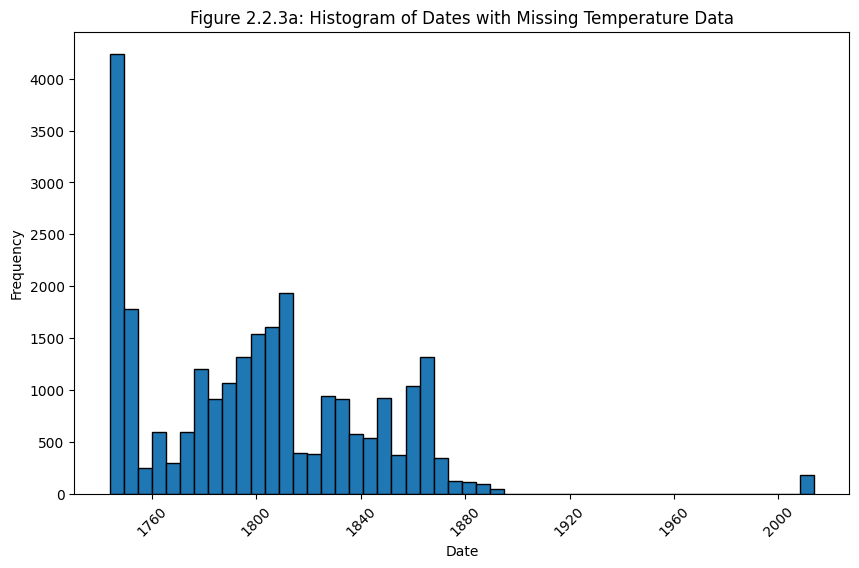

In [ ]:
# plotting histogram of dates with missing temperatures using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(global_temp_state_null['dt'], bins=50, edgecolor='black')
plt.title('Figure 2.2.3a: Histogram of Dates with Missing Temperature Data')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

There are 25648 rows with missing values within 645675 rows ($3.97$% of total data), and according to Figure 2.2.3a, these rows are concentrated in the earlier time periods. Because these rows consist of a small part of our dataset, we will drop them for analysis.

Do the same with 'State' column.

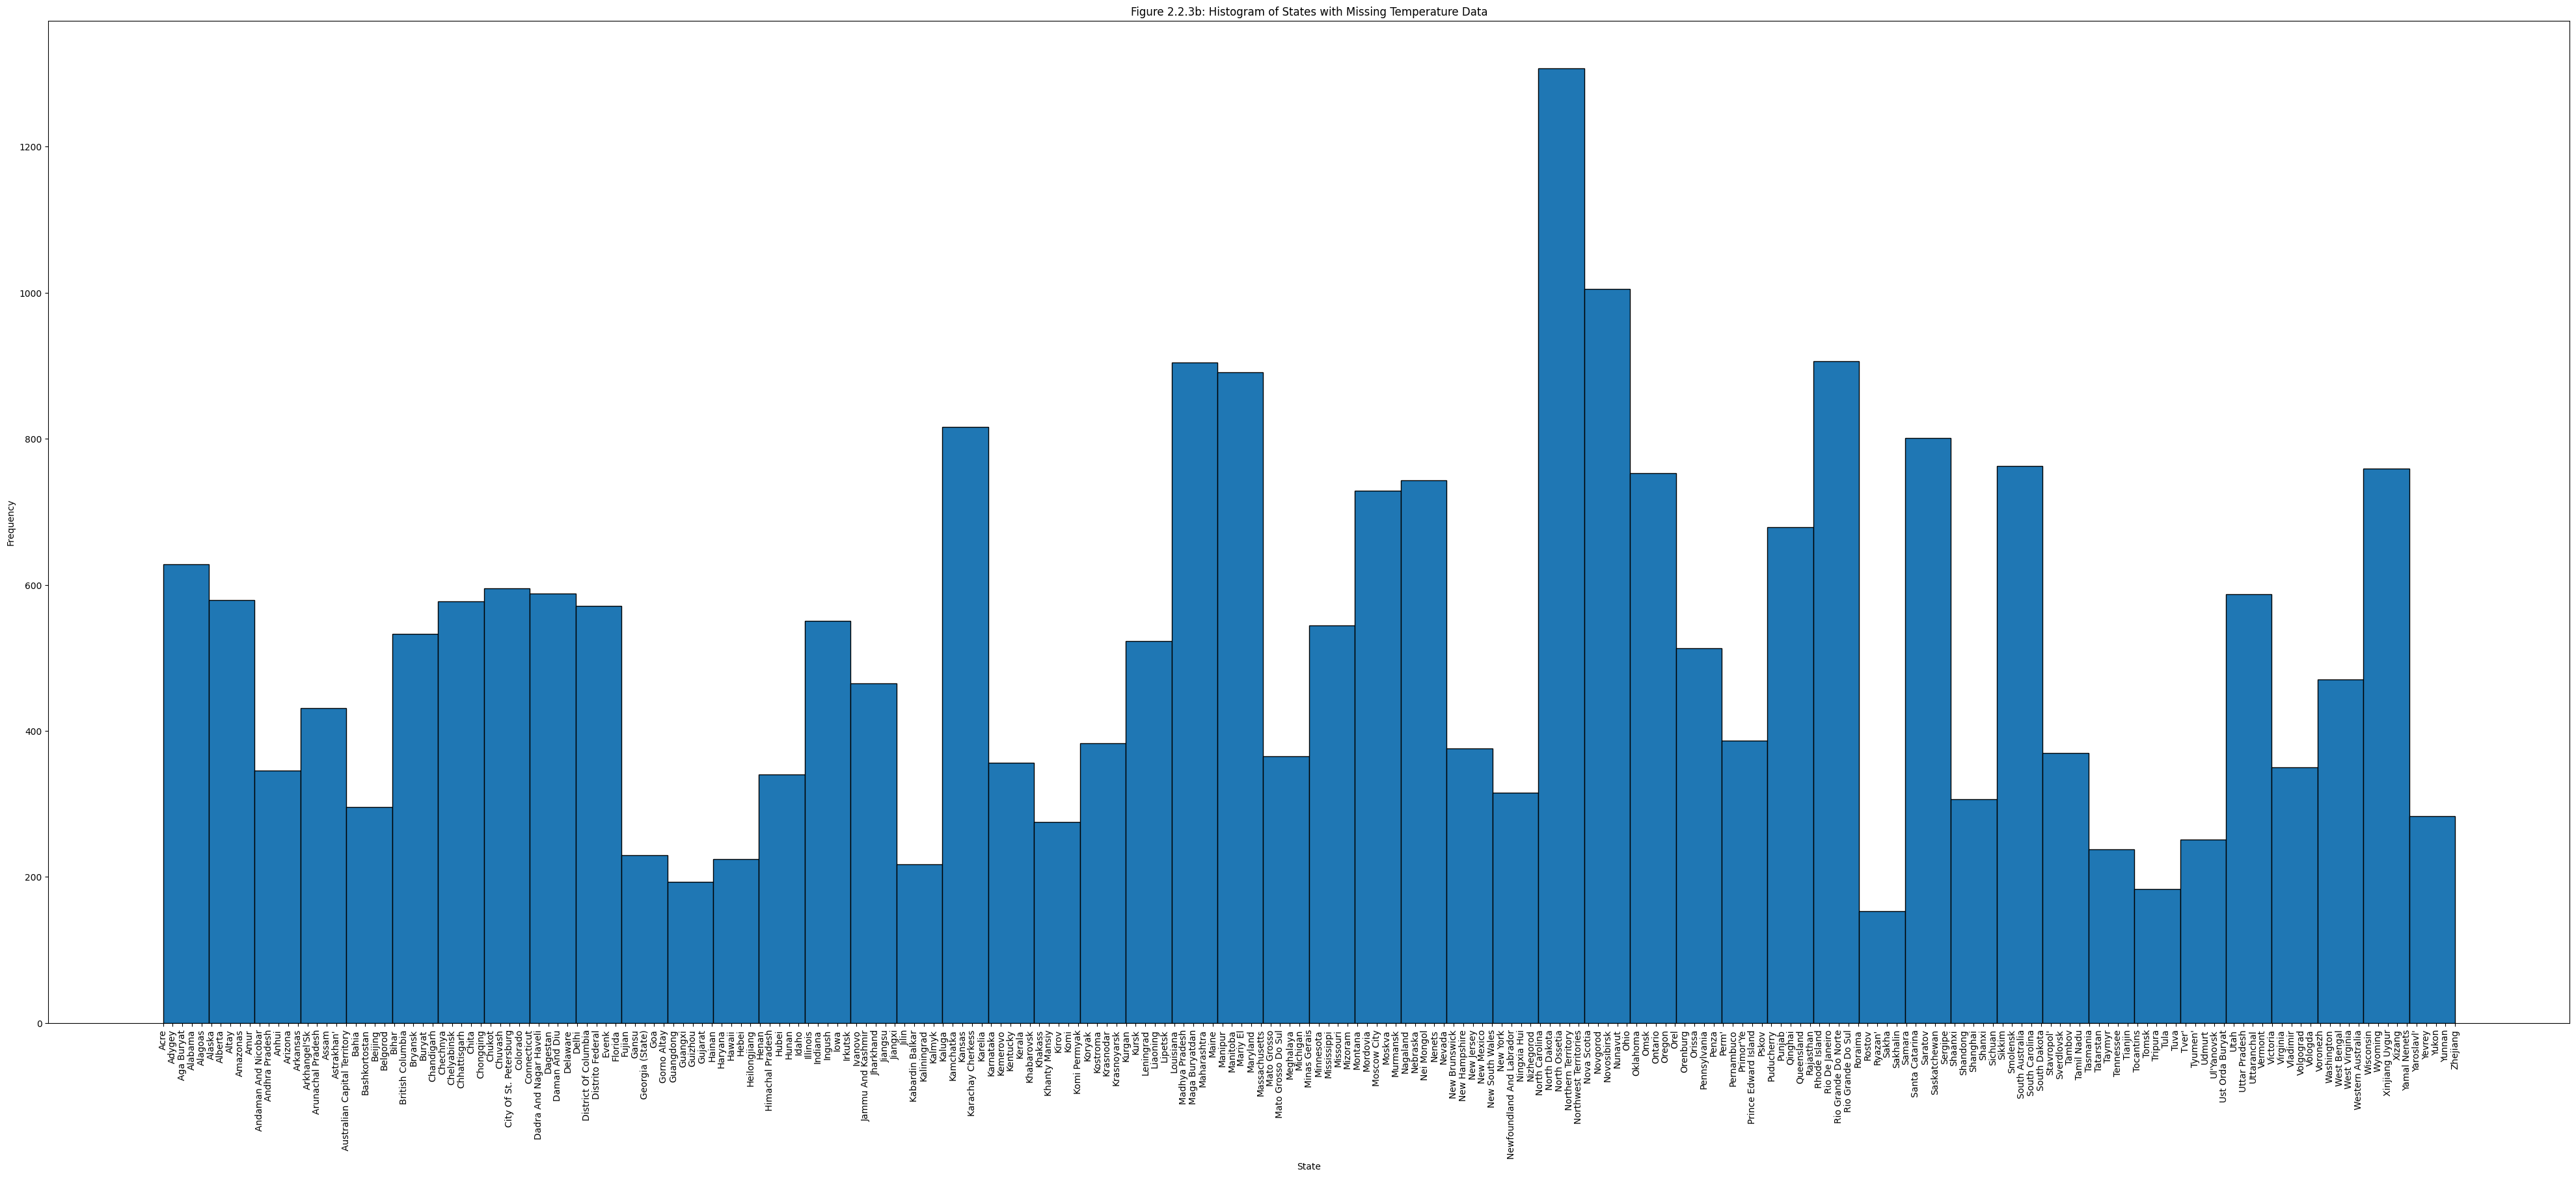

In [ ]:
# plotting histogram of states with missing temperatures using matplotlib
plt.figure(figsize=(50, 20))
plt.hist(global_temp_state_null['State'], bins=50, edgecolor='black')
plt.title('Figure 2.2.3b: Histogram of States with Missing Temperature Data')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

There are also 25648 rows with missing values within 645675 rows ($3.97$% of total data). As depicted in Figure 2.2.3b, these rows encompass cities worldwide. We will drop them because they take up such a small percentage of our data.

Do the same with 'Country' column.

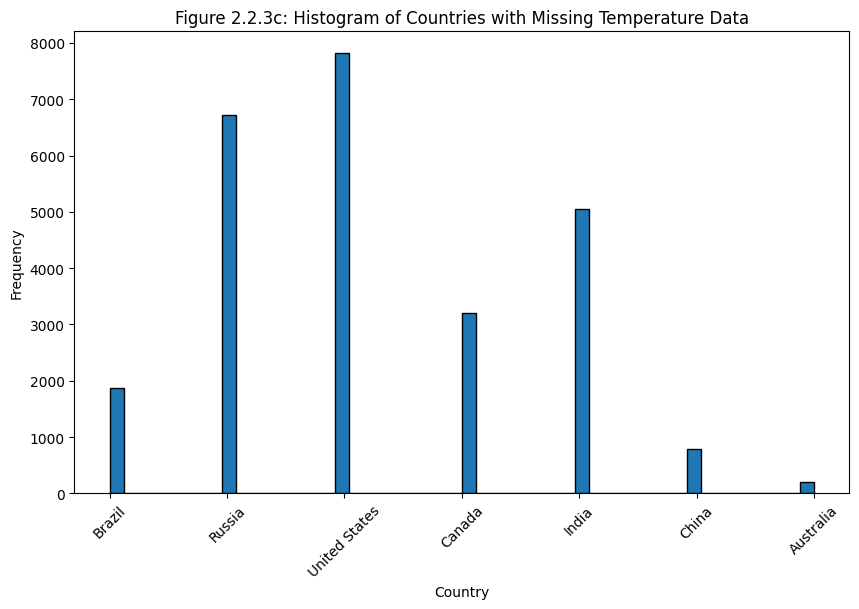

In [ ]:
# plotting histogram of countries with missing temperatures using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(global_temp_state_null['Country'], bins=50, edgecolor='black')
plt.title('Figure 2.2.3c: Histogram of Countries with Missing Temperature Data')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

This figure shows that the missing data is relatively evenly distributed between all countries, so we can drop it.

In [ ]:
global_temp_state_cleaned = global_temp_state.dropna()

## 2.3 Loading & Preprocessing Global Temperatures by Country Data

This section of the notebook explores the Kaggle GlobalLandTemperaturesByCountry.csv file (Global Average Land Temperature by State). It includes information on:

- Date (dt): Starting from 1855 to 2013.
- AverageTemperature: Represents the average land temperature in degrees Celsius.
- AverageTemperatureUncertainty: Indicates the 95% confidence interval around the average temperature.
- Country: Country the temperature was collected in.

We load the dataset into our notebook, and check that all cells are correct and present. Then, we clean the dataset:
- We convert the dt column into DateTime objects.
- We analyze the missing temperature data based on date and country.

### 2.3.1 Loading Data

In [ ]:
# reading in the csv file
global_temp_country = pd.read_csv('/content/drive/MyDrive/CIS545/CIS545 Final Project/data/GlobalLandTemperaturesByCountry.csv')

### 2.3.2 Analyzing Data Structure

In [ ]:
# getting the earliest data, to check that it was properly imported, and contains specified information
global_temp_country.head(5)

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [ ]:
# getting the latest data, to check that it was properly imported, and contains specified information
global_temp_country.tail(5)

dt  AverageTemperature  AverageTemperatureUncertainty  \
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe

In [ ]:
# checking that the file was properly imported and contains correct data
global_temp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [ ]:
# convert 'dt' to datetime
global_temp_country['dt'] = pd.to_datetime(global_temp_country['dt'])

In [ ]:
# get a summary of the central tendency, dispersion, and shape of the distribution of the numerical columns in the dataframe
global_temp_country.describe()

AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  545550.000000
mean            17.193354                       1.019057
std             10.953966                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.206000
max             38.842000                      15.003000

In [ ]:
# calculating the number of unique countries present in the 'Country' column
len(global_temp_country['Country'].unique().tolist())

243

After loading this data, and analyzing it, we discovered that this dataset presents information on the global temperatures for 243 countries.

This data is comprehensive for representing the entire world. The UN recognizes 251 counties and territories, which is close to the 243 that are represented in this dataset. However, something we noticed during EDA is that continents are considered countries in this dataset, so we will remove them in the next step.

In [ ]:
continents = ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', 'Antarctica']

global_temp_country = global_temp_country[~global_temp_country['Country'].isin(continents)]

### 2.3.3 Analyzing Data & Handling Missing Values

In [ ]:
global_temp_country_null = global_temp_country[global_temp_country.isnull().any(axis=1)]

In [ ]:
global_temp_country_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31274 entries, 1 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             31274 non-null  datetime64[ns]
 1   AverageTemperature             0 non-null      float64       
 2   AverageTemperatureUncertainty  0 non-null      float64       
 3   Country                        31274 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.2+ MB


In [ ]:
global_temp_country_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31274 entries, 1 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             31274 non-null  datetime64[ns]
 1   AverageTemperature             0 non-null      float64       
 2   AverageTemperatureUncertainty  0 non-null      float64       
 3   Country                        31274 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.2+ MB


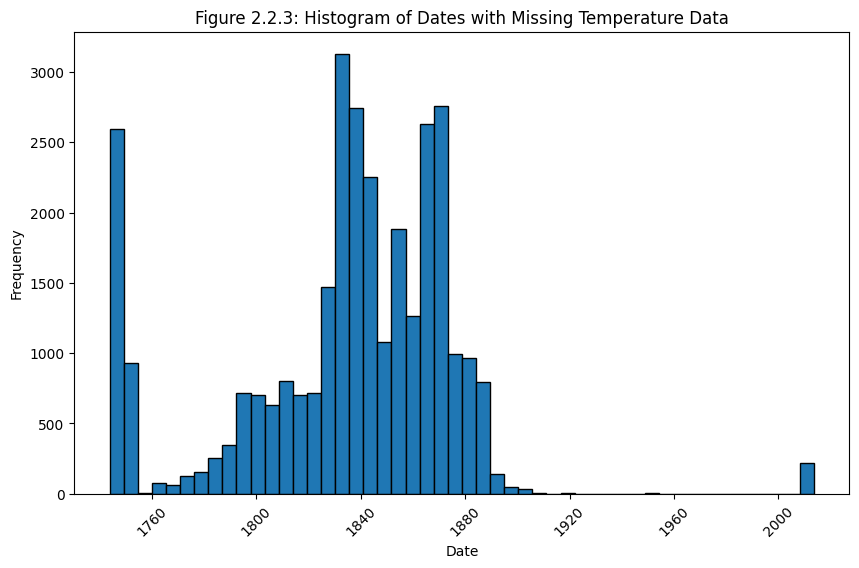

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(global_temp_country_null['dt'], bins=50, edgecolor='black')
plt.title('Figure 2.2.3: Histogram of Dates with Missing Temperature Data')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

There are 32651 rows with missing values within 577462 rows ($5.65$% of total data). Like before, the null values make up an insignificant percentage of our dataset, so we will drop it.

Do the same with 'Country' column.

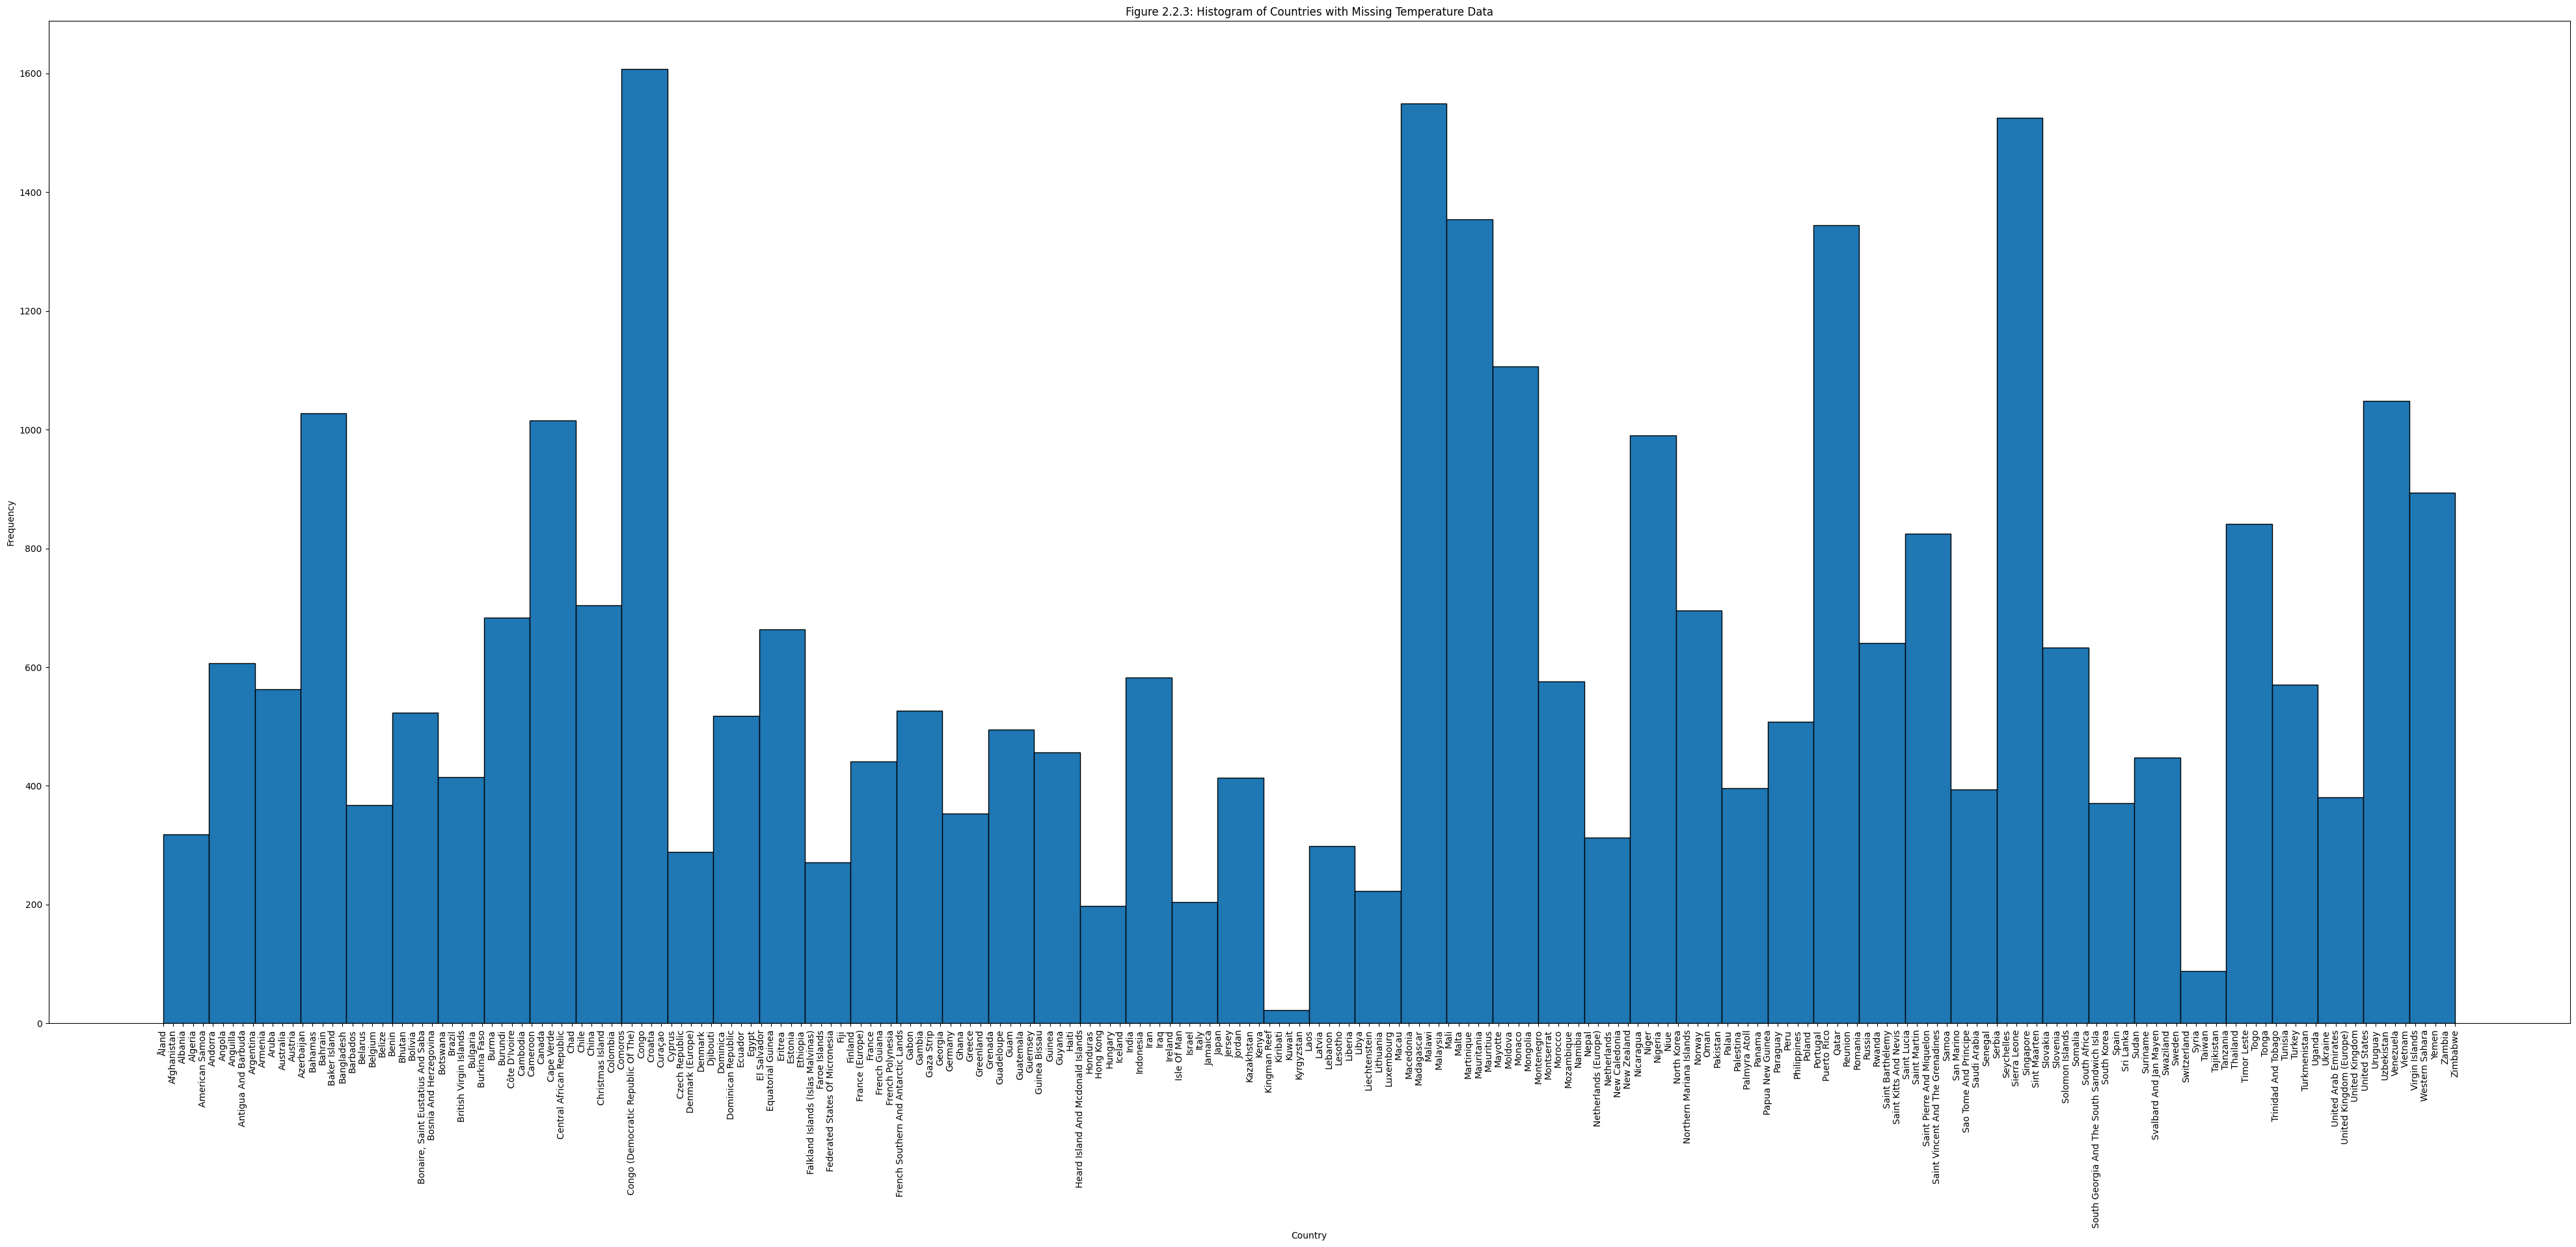

In [ ]:
plt.figure(figsize=(50, 20))
plt.hist(global_temp_country_null['Country'], bins=50, edgecolor='black')
plt.title('Figure 2.2.3: Histogram of Countries with Missing Temperature Data')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

There are 32651 rows with missing values within 577462 rows ($5.65$% of total data). Since these countries are spread throughout the world, we can drop the null values in our cleaned data.

In [ ]:
global_temp_country_cleaned = global_temp_country.dropna()

## 2.4 Loading & Preprocessing Global Temperatures by City Data

This section of the notebook explores the Kaggle GlobalLandTemperaturesByCity.csv file (Global Land Temperatures by City). It includes information on:

- Date (dt): Starting from 1743 to 2013.
- AverageTemperature: Represents the average land temperature in degrees Celsius.
- AverageTemperatureUncertainty: Indicates the 95% confidence interval around the average temperature.
- City: City that the temperature represents.
- Country: Country the city belongs to.
- Latitude: Latitudinal coordinates for the city.
- Longitude: Longitudinal coordinates for the city.

We load the dataset into our notebook, and check that all cells are correct and present. Then, we clean the dataset:
- We convert the dt column into DateTime objects.
- We analyze the missing temperature data based on date and country.

### 2.4.1 Loading Data

In [ ]:
# reading in the csv file
global_temp_city = pd.read_csv('/content/drive/MyDrive/CIS545/CIS545 Final Project/data/GlobalLandTemperaturesByCity.csv')

### 2.4.2 Analyzing Data Structure

In [ ]:
# getting the earliest data, to check that it was properly imported, and contains specified information
global_temp_city.head(10)

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   
5  1744-04-01               5.788                          3.624  Århus   
6  1744-05-01              10.644                          1.283  Århus   
7  1744-06-01              14.051                          1.347  Århus   
8  1744-07-01              16.082                          1.396  Århus   
9  1744-08-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  
5  Denmark   57.05N    10.33E  
6  Denmark   57.05N    10.33E  
7  Denmark   57.05N    10.33E  
8  Denmark   57.05N    10.33E  
9  Denmark   57.05N    10.33E

In [ ]:
# getting the latest data, to check that it was properly imported, and contains specified information
global_temp_city.tail(10)

dt  AverageTemperature  AverageTemperatureUncertainty  \
8599202  2012-12-01               4.303                          0.341   
8599203  2013-01-01               1.479                          0.217   
8599204  2013-02-01               1.559                          0.304   
8599205  2013-03-01               2.253                          0.267   
8599206  2013-04-01               7.710                          0.182   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
8599202  Zwolle  Netherlands   52.24N     5.26E  
8599203  Zwolle  Netherlands   52.24N     5.26E  
8599204  Zwolle  Netherlands   52.24N     5.26E  
8599205  Zwolle  Netherlands   52.24N     5.26E  
8599206  Zwolle  Netherlands   52.24N     5.26E  
8599207  Zwolle  Netherlands   52.24N     5.26E  
8599208  Zwolle  Netherlands   52.24N     5.26E  
8599209  Zwolle  Netherlands   52.24N     5.26E  
8599210  Zwolle  Netherlands   52.24N     5.26E  
8599211  Zwolle  Netherlands   52.24N     5.26E

In [ ]:
# checking that the file was properly imported and contains correct data
global_temp_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [ ]:
# convert dt to a datetime object
global_temp_city['dt'] = pd.to_datetime(global_temp_city['dt'])

In [ ]:
# get a summary of the central tendency, dispersion, and shape of the distribution of the numerical columns in the dataframe
global_temp_city.describe()

AverageTemperature  AverageTemperatureUncertainty
count        8.235082e+06                   8.235082e+06
mean         1.672743e+01                   1.028575e+00
std          1.035344e+01                   1.129733e+00
min         -4.270400e+01                   3.400000e-02
25%          1.029900e+01                   3.370000e-01
50%          1.883100e+01                   5.910000e-01
75%          2.521000e+01                   1.349000e+00
max          3.965100e+01                   1.539600e+01

In [ ]:
# determining the number of unique cities in our dataset
len(global_temp_city['City'].unique().tolist())

3448

In [ ]:
# determining the number of unique countries in our dataset
len(global_temp_city['Country'].unique().tolist())

159

From the above analysis, we know that our dataset spans 3,448 cities in 159 countries. This is an extremely comprehensize dataset, which spans countries around the globe, and can be used to analyze temperature change for these cities and the countries these cities lie in.

### 2.4.3 Analyzing Data & Handling Missing Values

Since Latitude and Longtitude are of type object due to their ending letters, we will drop them and convert both columns to type float with signs for easier visualization.

In [ ]:
#drop the ending letter in Latitude and Longitude
global_temp_city['Latitude'] = np.where(global_temp_city['Latitude'].str.contains('S'),
                                        '-' + global_temp_city['Latitude'],
                                        global_temp_city['Latitude'])
global_temp_city['Longitude'] = np.where(global_temp_city['Longitude'].str.contains('W'),
                                         '-' + global_temp_city['Longitude'],
                                         global_temp_city['Longitude'])

#convert Latitude and Longtitude to type float
global_temp_city['Latitude'] = global_temp_city['Latitude'].str.replace('N', '').str.replace('S', '').astype(float)
global_temp_city['Longitude'] = global_temp_city['Longitude'].str.replace('E', '').str.replace('W', '').astype(float)

Take a look at the nulls and their distribution before deciding to drop them or impute them.

In [ ]:
# creating a new dataframe that contains only the null rows from the original dataframe
global_temp_city_null = global_temp_city[global_temp_city.isnull().any(axis=1)]

In [ ]:
# getting summary of the dataframe, including the data types of each column and the number of non-null values
global_temp_city_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364130 entries, 1 to 8599211
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             364130 non-null  datetime64[ns]
 1   AverageTemperature             0 non-null       float64       
 2   AverageTemperatureUncertainty  0 non-null       float64       
 3   City                           364130 non-null  object        
 4   Country                        364130 non-null  object        
 5   Latitude                       364130 non-null  float64       
 6   Longitude                      364130 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 22.2+ MB


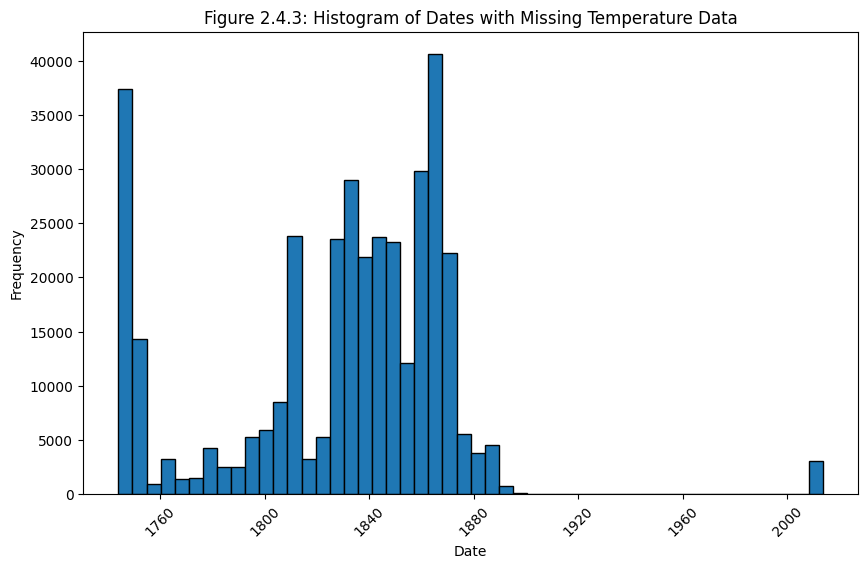

In [ ]:
# plotting histogram of dates with missing temperatures using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(global_temp_city_null['dt'], bins=50, edgecolor='black')
plt.title('Figure 2.4.3: Histogram of Dates with Missing Temperature Data')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Like in the other datasets, the rows with missing temperature data are concentrated in the earlier time periods. Specifically, 364130 out of 8599212 rows contain a null temperature value (4.23%). Dropping these rows still maintains the majority of our dataset, so we will remove them from our data.

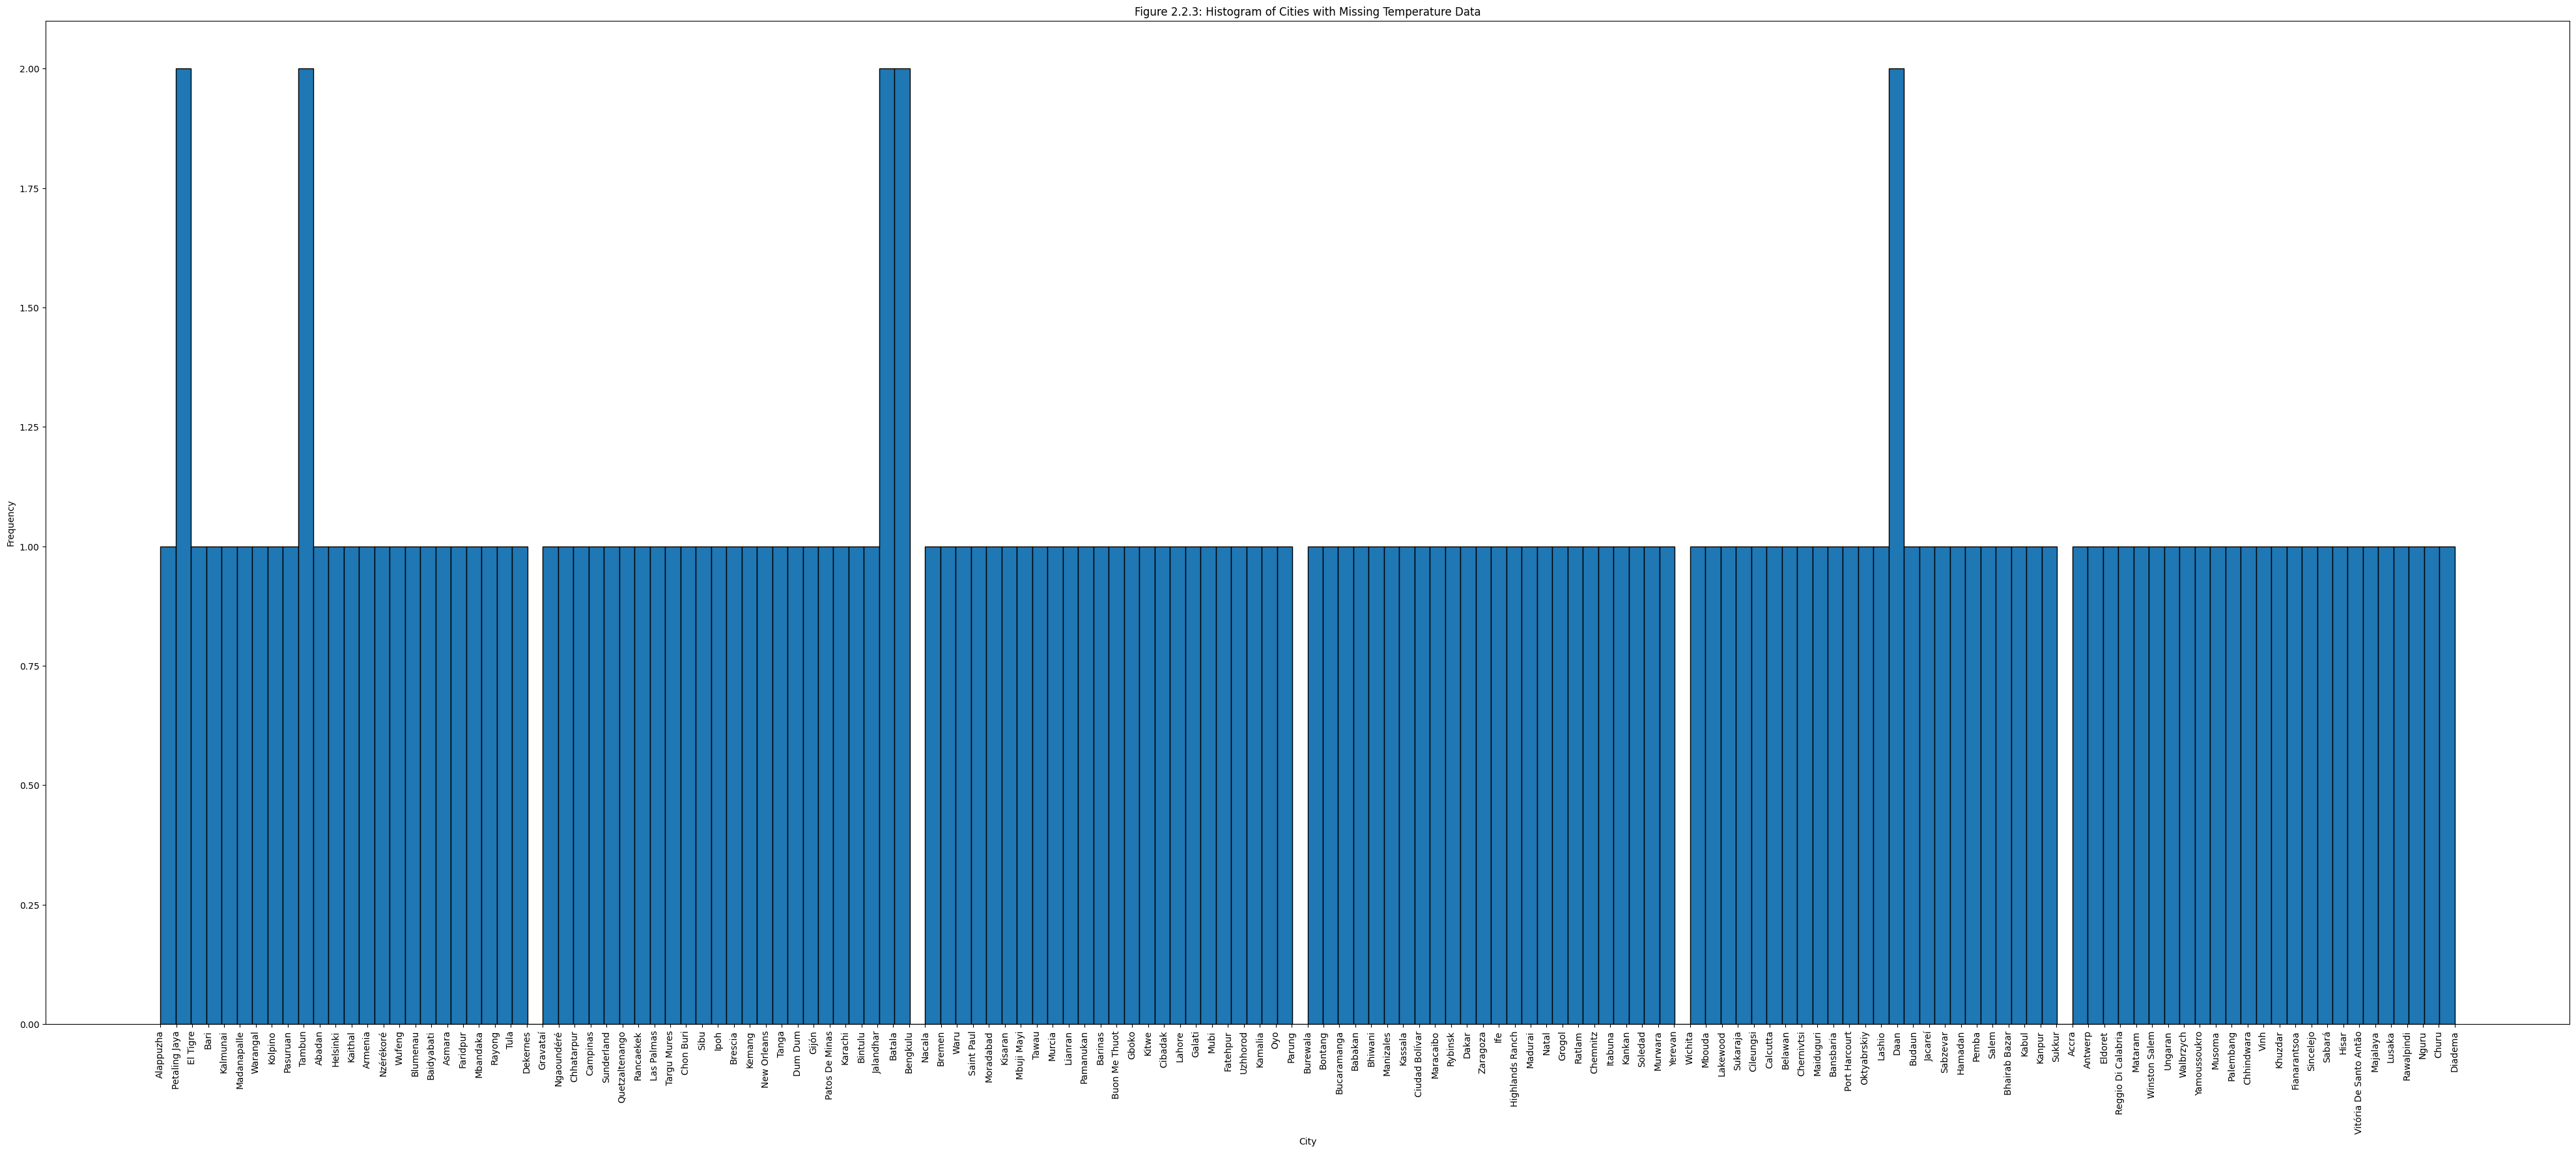

In [ ]:
plt.figure(figsize=(50, 20))
selected_cities = np.random.choice(global_temp_city_null['City'], size=150, replace=False)
plt.hist(selected_cities, bins=150, edgecolor='black')
plt.title('Figure 2.2.3: Histogram of Cities with Missing Temperature Data')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Since the null values account for 4.23% of our dataset, we will drop them.

In [ ]:
global_temp_city_cleaned = global_temp_city.dropna()

## 2.5 Loading & Preprocessing Global Temperatures by Major City Data

This section of the notebook explores the Kaggle GlobalTemperaturesByMajorCity.csv file (Global Average Land Temperature by Major City). It includes information on:

- Date (dt): Starting from 1855 to 2013.
- AverageTemperature: Represents the average land temperature in degrees Celsius.
- AverageTemperatureUncertainty: Indicates the 95% confidence interval around the average temperature.
- City: City that the temperature represents.
- Country: Country the city belongs to.
- Latitude: Latitudinal coordinate of the city
- Longitude: Longitudinal coordinate of the city

We load the dataset into our notebook, and check that all cells are correct and present. Then, we clean the dataset:
- We convert the dt column into DateTime objects.
- We analyze the missing temperature data based on date and city.

### 2.5.1 Loading Data

In [ ]:
# reading in the csv file
global_temp_major_city = pd.read_csv('/content/drive/MyDrive/CIS545/CIS545 Final Project/data/GlobalLandTemperaturesByMajorCity.csv')

### 2.5.2 Analyzing Data Structure

In [ ]:
# getting the earliest data, to check that it was properly imported, and contains specified information
global_temp_major_city.head(10)

dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01              28.101                          1.612  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   
5  1849-06-01              24.844                          1.402  Abidjan   
6  1849-07-01              24.058                          1.254  Abidjan   
7  1849-08-01              23.576                          1.265  Abidjan   
8  1849-09-01              23.662                          1.226  Abidjan   
9  1849-10-01              25.263                          1.175  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  
5  Côte D'Ivoire    5.63N     3.23W  
6  Côte D'Ivoire    5.63N     3.23W  
7  Côte D'Ivoire    5.63N     3.23W  
8  Côte D'Ivoire    5.63N     3.23W  
9  Côte D'Ivoire    5.63N     3.23W

In [ ]:
# getting the latest data, to check that it was properly imported, and contains specified information
global_temp_major_city.tail(10)

dt  AverageTemperature  AverageTemperatureUncertainty  City  \
239167  2012-12-01              -0.822                          0.451  Xian   
239168  2013-01-01              -1.635                          0.432  Xian   
239169  2013-02-01               2.362                          0.558  Xian   
239170  2013-03-01              10.110                          0.480  Xian   
239171  2013-04-01              12.563                          1.823  Xian   
239172  2013-05-01              18.979                          0.807  Xian   
239173  2013-06-01              23.522                          0.647  Xian   
239174  2013-07-01              25.251                          1.042  Xian   
239175  2013-08-01              24.528                          0.840  Xian   
239176  2013-09-01                 NaN                            NaN  Xian   

       Country Latitude Longitude  
239167   China   34.56N   108.97E  
239168   China   34.56N   108.97E  
239169   China   34.56N   108.97E  
239170   China   34.56N   108.97E  
239171   China   34.56N   108.97E  
239172   China   34.56N   108.97E  
239173   China   34.56N   108.97E  
239174   China   34.56N   108.97E  
239175   China   34.56N   108.97E  
239176   China   34.56N   108.97E

In [ ]:
# checking that the file was properly imported and contains correct data
global_temp_major_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [ ]:
# convert 'dt' to datetime
global_temp_major_city['dt'] = pd.to_datetime(global_temp_major_city['dt'])

In [ ]:
# get a summary of the central tendency, dispersion, and shape of the distribution of the numerical columns in the dataframe
global_temp_major_city.describe()

AverageTemperature  AverageTemperatureUncertainty
count       228175.000000                  228175.000000
mean            18.125969                       0.969343
std             10.024800                       0.979644
min            -26.772000                       0.040000
25%             12.710000                       0.340000
50%             20.428000                       0.592000
75%             25.918000                       1.320000
max             38.283000                      14.037000

In [ ]:
# calculating the number of unique cities present in the 'City' column
len(global_temp_major_city['City'].unique().tolist())

100

In [ ]:
# calculating the number of unique cities present in the 'Country' column
len(global_temp_major_city['Country'].unique().tolist())

49

After loading this data and analyzing it, we discovered that this dataset presents information on the global temperatures for 100 cities in 49 countries.

While this data isn't as comprehensive as the Cities or Countries file for representing the entire world, it provides us with temperature information for major cities, which can be used to determine how temperature changes will affect areas with higher populations.

### 2.5.3 Analyzing Data & Handling Missing Values

Same as the Global Temperatures by City data above, we will convert Latitude and Longtitude to type float.

In [ ]:
#drop the ending letter in Latitude and Longitude
global_temp_major_city['Latitude'] = np.where(global_temp_major_city['Latitude'].str.contains('S'),
                                        '-' + global_temp_major_city['Latitude'],
                                        global_temp_major_city['Latitude'])
global_temp_major_city['Longitude'] = np.where(global_temp_major_city['Longitude'].str.contains('W'),
                                         '-' + global_temp_major_city['Longitude'],
                                         global_temp_major_city['Longitude'])

#convert Latitude and Longtitude to type float
global_temp_major_city['Latitude'] = global_temp_major_city['Latitude'].str.replace('N', '').str.replace('S', '').astype(float)
global_temp_major_city['Longitude'] = global_temp_major_city['Longitude'].str.replace('E', '').str.replace('W', '').astype(float)

In [ ]:
# getting all rows that have null values
global_temp_major_city_null = global_temp_major_city[global_temp_major_city.isnull().any(axis=1)]

In [ ]:
# getting a concise summary of the global_temp_state_null dataframe, to see what values are null
global_temp_major_city_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11002 entries, 36 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             11002 non-null  datetime64[ns]
 1   AverageTemperature             0 non-null      float64       
 2   AverageTemperatureUncertainty  0 non-null      float64       
 3   City                           11002 non-null  object        
 4   Country                        11002 non-null  object        
 5   Latitude                       11002 non-null  float64       
 6   Longitude                      11002 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 687.6+ KB


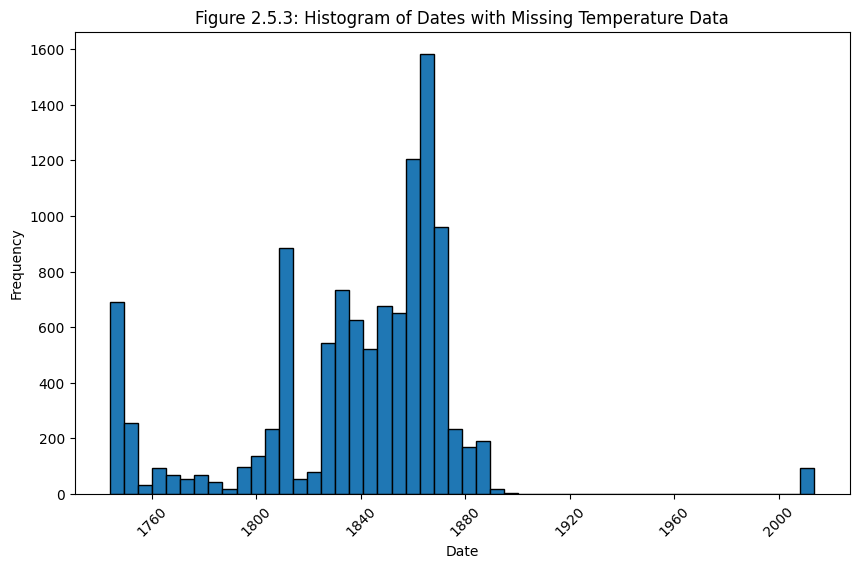

In [ ]:
# plotting histogram of dates with missing temperatures using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(global_temp_major_city_null['dt'], bins=50, edgecolor='black')
plt.title('Figure 2.5.3: Histogram of Dates with Missing Temperature Data')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The rows account for 4.60% of the dataset (11002 out of 239117 rows). We will drop them.

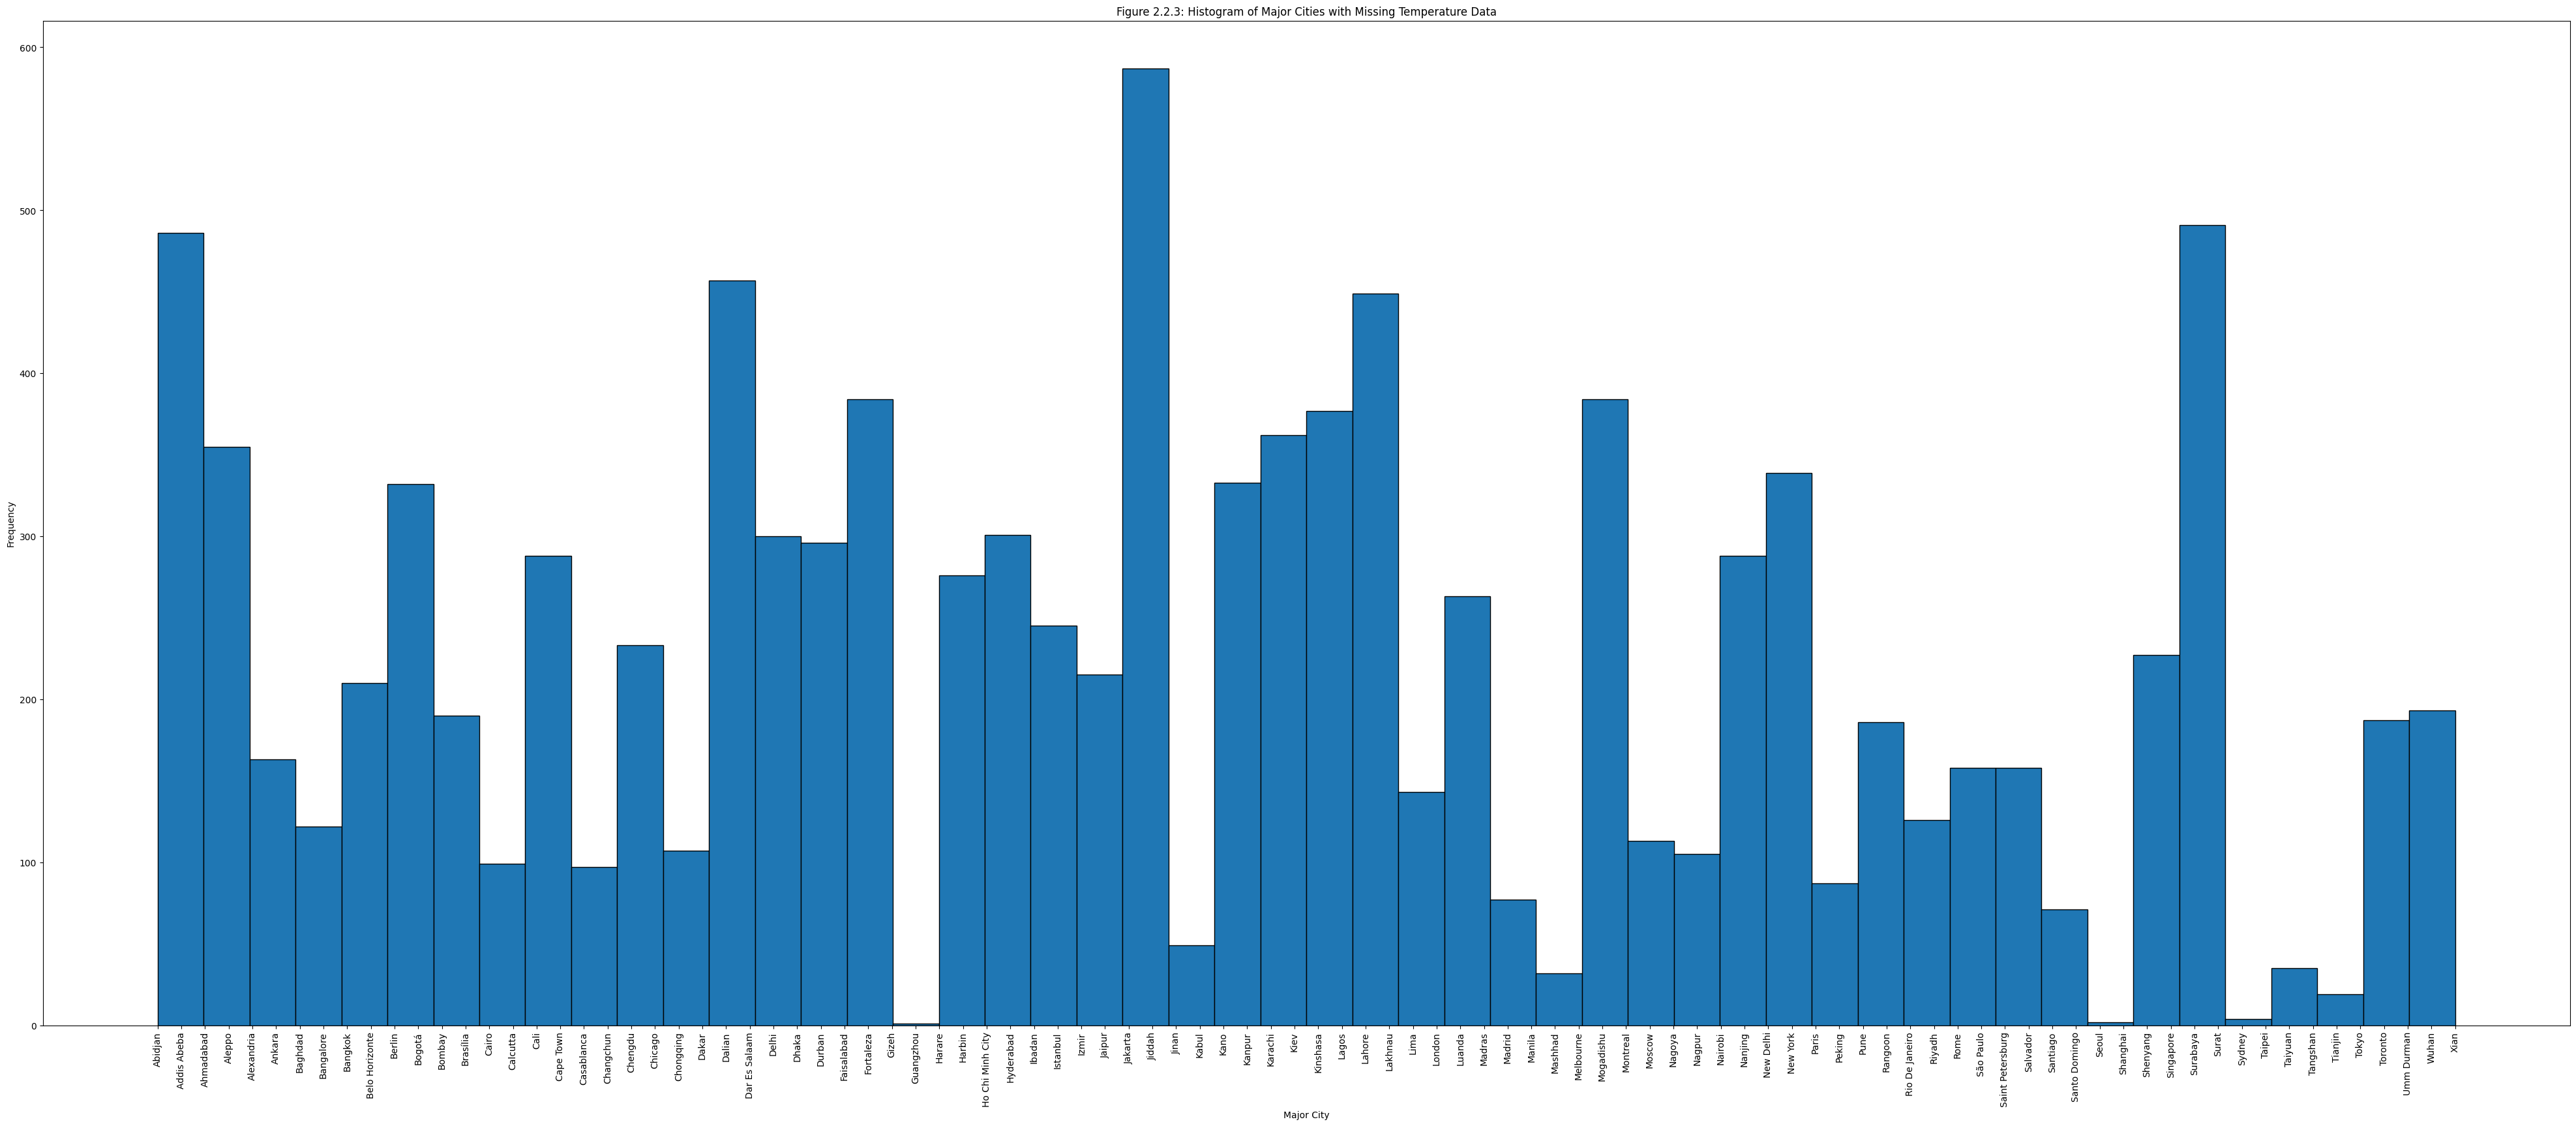

In [ ]:
plt.figure(figsize=(50, 20))
plt.hist(global_temp_major_city_null['City'], bins=50, edgecolor='black')
plt.title('Figure 2.2.3: Histogram of Major Cities with Missing Temperature Data')
plt.xlabel('Major City')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Similar to the previous datasets, the major cities that have missing temperature data are distributed around the world, and take up an insignificant fraction of our dataset. We will drop them.

In [ ]:
global_temp_major_city_cleaned = global_temp_major_city.dropna()

# Part 3: Exploratory Data Analysis

## 3.1 EDA in Global Land Temperatures Data

The following section conducts exploratory data analysis on the Global Land Temperatures Data.

### 3.1.1 Visualize Trends in Land Data

The type of plot being created in this code is a line plot. It is used to visualize the trend in land average temperature over time. The plot includes two lines:

- Monthly Average Temperature: This line represents the monthly average land temperature over time. It is drawn with some transparency (alpha=0.5) to show individual data points.

- 10-Year Rolling Average: This line represents the 10-year rolling average of the land temperature. It is calculated to smooth out short-term fluctuations and highlight long-term trends.

<ipython-input-285-5405f1ac65bb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



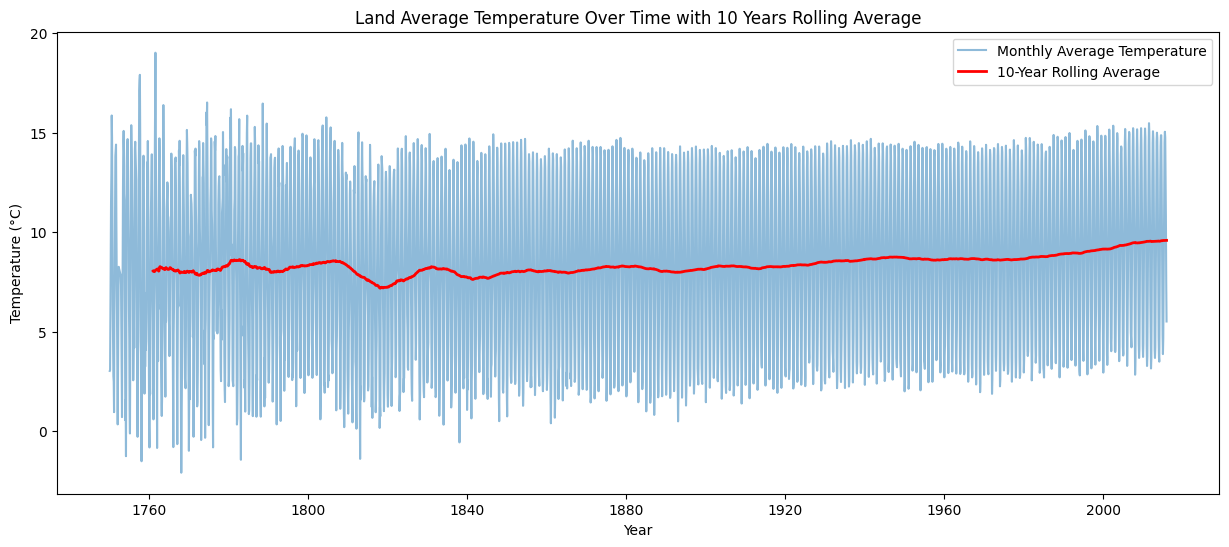

In [ ]:
#calculate 10_year_rolling_avg
global_temp_land_cleaned['10_year_rolling_avg'] = global_temp_land_cleaned['LandAverageTemperature'].rolling(window=120).mean()

# Plot monthly average temperature and 10-year rolling average
plt.figure(figsize=(15, 6))
plt.plot(global_temp_land_cleaned['dt'], global_temp_land_cleaned['LandAverageTemperature'], label='Monthly Average Temperature', alpha=0.5)
plt.plot(global_temp_land_cleaned['dt'], global_temp_land_cleaned['10_year_rolling_avg'], label='10-Year Rolling Average', color='red', linewidth=2)
plt.title('Land Average Temperature Over Time with 10 Years Rolling Average')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

We don't observe that much pattern; there is a slight upward trend, but not obvious enough to be significant.

### 3.1.2 Interactive Graph

This code creates an interactive Plotly line plot to illustrate the average land temperature and its uncertainty over the years. It first calculates the mean temperature and uncertainty for each year, then utilizes Plotly to generate a plot with two traces representing upper and lower uncertainty bounds, along with a trace for average temperature. The resulting interactive plot allows for a dynamic exploration of temperature trends.

In [ ]:
# Extract the year from a date
years = np.unique(global_temp_land_cleaned['dt'].dt.year)
mean_temp_world = []
mean_temp_world_uncertainty = []

# Calculate mean temperature and uncertainty for each year
for year in years:
    mean_temp_world.append(global_temp_land_cleaned[global_temp_land_cleaned['dt'].dt.year == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp_land_cleaned[global_temp_land_cleaned['dt'].dt.year == year]['LandAverageTemperatureUncertainty'].mean())

# Create a Scatter plot for uncertainty (top)
trace0 = go.Scatter(
    x = years,
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
                color='rgb(0, 255, 255)',
    )
)

# Create a Scatter plot for uncertainty (bottom)
trace1 = go.Scatter(
    x = years,
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

# Create a Scatter plot for average temperature
trace2 = go.Scatter(
    x = years,
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)

# Combine traces into data list
data = [trace0, trace1, trace2]

# Create plot
layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

From the plot, we can see that the average land temperature of the world stayed relatively consistent from 1750 to the 1950s. However, since then, we observe in our plot, that there is a steady upwards trend in average land temperature. See the below plot for a comparison in average land temperature from 1900 to 1950 versus average land temperature from 1950 - 2015.

In [ ]:
# Extract the year from a date
years = np.unique(global_temp_land_cleaned['dt'].dt.year)
mean_temp_world = []
mean_temp_world_uncertainty = []

# Calculate mean temperature and uncertainty for each year
for year in years:
    mean_temp_world.append(global_temp_land_cleaned[global_temp_land_cleaned['dt'].dt.year == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp_land_cleaned[global_temp_land_cleaned['dt'].dt.year == year]['LandAverageTemperatureUncertainty'].mean())

# Filter data for two date ranges
years_1900_1950 = np.unique(global_temp_land_cleaned[(global_temp_land_cleaned['dt'].dt.year >= 1900) & (global_temp_land_cleaned['dt'].dt.year <= 1950)]['dt'].dt.year)
years_1950_2015 = np.unique(global_temp_land_cleaned[(global_temp_land_cleaned['dt'].dt.year > 1950) & (global_temp_land_cleaned['dt'].dt.year <= 2015)]['dt'].dt.year)

# Create a Scatter plot for uncertainty (top) - 1900-1950
trace0_1900_1950 = go.Scatter(
    x=years_1900_1950,
    y=np.array(mean_temp_world)[years_1900_1950 - years.min()] + np.array(mean_temp_world_uncertainty)[years_1900_1950 - years.min()],
    fill=None,
    mode='lines',
    name='Uncertainty top (1900-1950)',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

# Create a Scatter plot for uncertainty (bottom) - 1900-1950
trace1_1900_1950 = go.Scatter(
    x=years_1900_1950,
    y=np.array(mean_temp_world)[years_1900_1950 - years.min()] - np.array(mean_temp_world_uncertainty)[years_1900_1950 - years.min()],
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot (1900-1950)',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

# Create a Scatter plot for average temperature - 1900-1950
trace2_1900_1950 = go.Scatter(
    x=years_1900_1950,
    y=np.array(mean_temp_world)[years_1900_1950 - years.min()],
    name='Average Temperature (1900-1950)',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)

# Create a Scatter plot for uncertainty (top) - 1950-2015
trace0_1950_2015 = go.Scatter(
    x=years_1950_2015,
    y=np.array(mean_temp_world)[years_1950_2015 - years.min()] + np.array(mean_temp_world_uncertainty)[years_1950_2015 - years.min()],
    fill=None,
    mode='lines',
    name='Uncertainty top (1950-2015)',
    line=dict(
        color='rgb(255, 0, 0)',
    )
)

# Create a Scatter plot for uncertainty (bottom) - 1950-2015
trace1_1950_2015 = go.Scatter(
    x=years_1950_2015,
    y=np.array(mean_temp_world)[years_1950_2015 - years.min()] - np.array(mean_temp_world_uncertainty)[years_1950_2015 - years.min()],
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot (1950-2015)',
    line=dict(
        color='rgb(255, 0, 0)',
    )
)

# Create a Scatter plot for average temperature - 1950-2015
trace2_1950_2015 = go.Scatter(
    x=years_1950_2015,
    y=np.array(mean_temp_world)[years_1950_2015 - years.min()],
    name='Average Temperature (1950-2015)',
    line=dict(
        color='rgb(0, 128, 0)',
    )
)

# Combine traces into data list for both date ranges
data = [trace0_1900_1950, trace1_1900_1950, trace2_1900_1950, trace0_1950_2015, trace1_1950_2015, trace2_1950_2015]

# Create plot for both date ranges
layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)

# Display the plot
py.iplot(fig)

Clearly, there is a large disparity in the average temperature changes between these time periods. Specifically, the temperature from 1900 - 1950 fluctuates around 8.5 degrees, while from 1950 - 2015, the average temperature is steadily rising to almost 10 degrees.

### 3.1.3 Stationarity Check

Time series data often requires data to be stationary, meaning the mean and variance do not change over time. If this property is violated, then the data has some inherent trend, which is the case in climate change data. To check, we will set our alpha to be 0.05 and perform Dickey-Fuller test from *adfuller* package for stationarity. Our null hypothesis is that our data is not stationary.

In [ ]:
# Checking the hypothesis
print("The p-value for the ADF test in global_temp_land_cleaned is ", adfuller(global_temp_land_cleaned['LandAverageTemperature'])[1])

The p-value for the ADF test in global_temp_land_cleaned is  0.001454722381905835


Since the p-value for *global_temp_land_cleaned* is less than alpha (0.05), **we reject the null hypothesis**. The *global_temp_land_cleaned* data is stationary. We can proceed with autocorrelations check.

### 3.1.4 Autocorrelations Check

The following code is visually inspecting the autocorrelation and partial autocorrelation of the 'LandAverageTemperature' time series data to gain insights into potential temporal patterns and dependencies in the data.

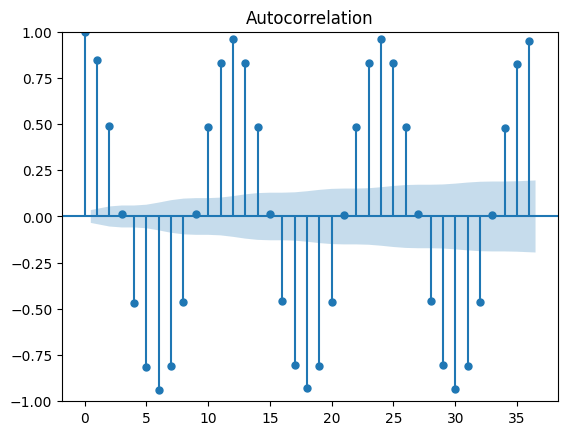

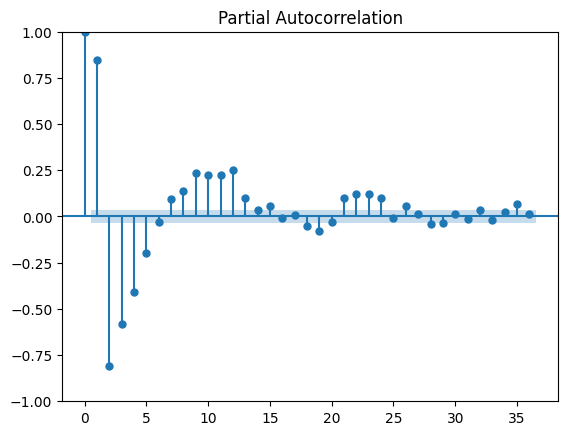

In [ ]:
# Creating autocorrelation plot
plot_acf(global_temp_land_cleaned['LandAverageTemperature'])
plot_pacf(global_temp_land_cleaned['LandAverageTemperature'])
plt.show()

In the autocorrelation plots, we see significant spikes and patterns. This suggests that the land temperatures have a presence of seasonality, which is clearly true because temperatures change based on weather patterns, which display a seasonal pattern.

In the partial autocorrelation plot, we see the same wave-like pattern, which highlights the presence of seasonality. It's interesting to see that the beginning of the plot has much higher magnitudes, and over time, the peaks get smaller in magnitude (i.e. there exists a dampening effect). This seems to mean that the influence of past cycles is weakening over time.

## 3.2 EDA in Global Land and Ocean Temperatures Data

The following section conducts exploratory data analysis on the Global Land and Ocean Temperatures Data.

### 3.2.1 Visualize Trends in Land and Ocean Data

The type of plot being created in this code is a line plot. It is used to visualize the trend in land and ocean average temperature over time. The plot includes two lines:

- Monthly Average Temperature: This line represents the monthly average land temperature over time. It is drawn with some transparency (alpha=0.5) to show individual data points.

- 10-Year Rolling Average: This line represents the 10-year rolling average of the land temperature. It is calculated to smooth out short-term fluctuations and highlight long-term trends.

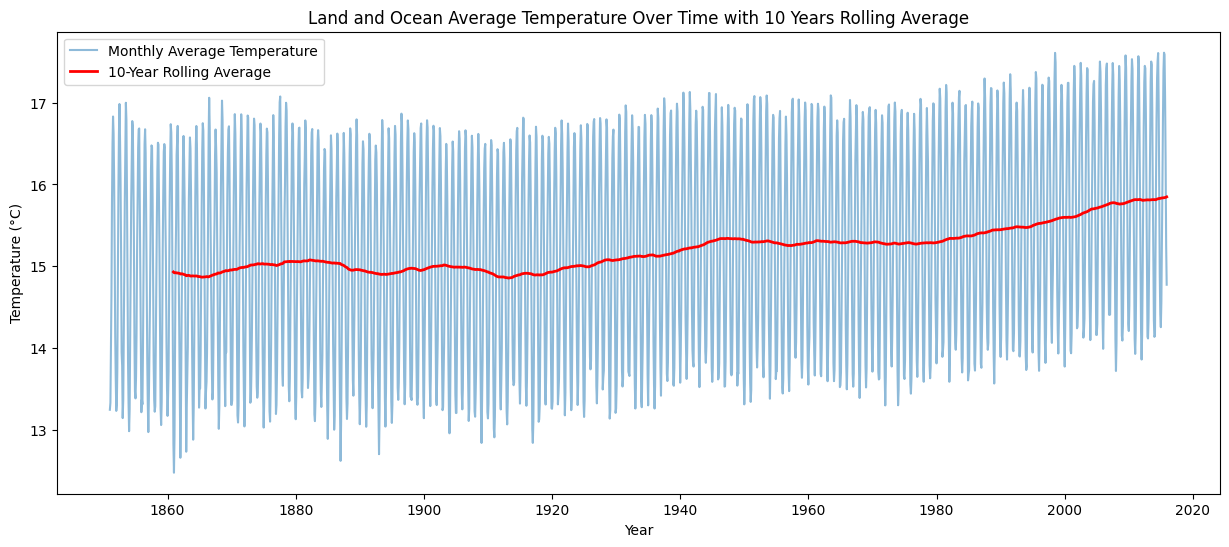

In [ ]:
# Calculate 10_year_rolling_avg
global_temp_land_and_ocean_cleaned['10_year_rolling_avg_ocean'] = global_temp_land_and_ocean_cleaned['LandAndOceanAverageTemperature'].rolling(window=120).mean()

# Plot monthly average temperature and 10-year rolling average
plt.figure(figsize=(15, 6))
plt.plot(global_temp_land_and_ocean_cleaned['dt'], global_temp_land_and_ocean_cleaned['LandAndOceanAverageTemperature'], label='Monthly Average Temperature', alpha=0.5)
plt.plot(global_temp_land_and_ocean_cleaned['dt'], global_temp_land_and_ocean_cleaned['10_year_rolling_avg_ocean'], label='10-Year Rolling Average', color='red', linewidth=2)
plt.title('Land and Ocean Average Temperature Over Time with 10 Years Rolling Average')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

Compared to the land temperature trend, the land and ocean temperature trend has a significantly steeper slope, indicating that ocean temperature has increased more over time compared to land temperature, which is concerning since 71 percent of Earth's surface is water. This could indicate the non-stationarity of the land and ocean temperatures.

Additionally, temperature warming is often noticed earlier in ocean temperates. This means that the steeper slope that we are seeing in this graph may be indicative of more extreme changes in land temperatures in the next few years.

### 3.2.2 Interactive Graph

This code creates another interactive Plotly line plot to illustrate the average land and ocean temperatures and their uncertainty over the years. The resulting interactive plot allows for a dynamic exploration of temperature trends.

In [ ]:
# Extract the year from a date
years_ocean = np.unique(global_temp_land_and_ocean_cleaned['dt'].dt.year)
mean_temp_world_ocean = []
mean_temp_world_ccean_uncertainty = []

# Calculate mean temperature and uncertainty for each year
for year in years_ocean:
    mean_temp_world_ocean.append(global_temp_land_and_ocean_cleaned[global_temp_land_and_ocean_cleaned['dt'].dt.year == year]['LandAndOceanAverageTemperature'].mean())
    mean_temp_world_ccean_uncertainty.append(global_temp_land_and_ocean_cleaned[global_temp_land_and_ocean_cleaned['dt'].dt.year == year]['LandAndOceanAverageTemperatureUncertainty'].mean())

# Create a Scatter plot for uncertainty (top)
trace0 = go.Scatter(
    x = years_ocean,
    y = np.array(mean_temp_world_ocean) + np.array(mean_temp_world_ccean_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
                color='rgb(0, 255, 255)',
    )
)

# Create a Scatter plot for uncertainty (bottom)
trace1 = go.Scatter(
    x = years_ocean,
    y = np.array(mean_temp_world_ocean) - np.array(mean_temp_world_ccean_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

# Create a Scatter plot for average temperature
trace2 = go.Scatter(
    x = years_ocean,
    y = mean_temp_world_ocean,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)

# Combine traces into data list
data = [trace0, trace1, trace2]

# Create plot
layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land and ocean temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

The graph reiterates how there is a clear trend of global temperature increase in recent decades. An interesting finding from this graph shows us that average land and temperatures in the world have been increasing since before the 1950s (which is a commonly attributed starting point for the beginning of global warming, due to the rapid industrialization post World War II).

Specifically, from observation, it seems like average land and ocean temperatures in the world have been increasing since the early 1900s. Scientists attribute this rise in temperature to the effects of early industrialization in the late 18th century and 19th century.

It's also interesting to note that the effects of climate change, particularly warming, are often noticed earlier in average ocean temperatures compared to land temperatures is due to the inherent characteristics of the Earth's climate system and the distribution of heat. Thus, the rapid rise in average temperature from 2011 - 2015 could be a noteworthy factor when anticipating trends in average land temperature.

### 3.2.3 Stationarity in Global Land and Ocean Temperatures Data

In [ ]:
print("The p-value for the ADF test in global_temp_land_and_ocean_cleaned is ", adfuller(global_temp_land_and_ocean_cleaned['LandAndOceanAverageTemperature'])[1])

The p-value for the ADF test in global_temp_land_and_ocean_cleaned is  0.7361269975238701


Since the p-value for *global_temp_land_and_ocean_cleaned* is greater than alpha (0.05), **we fail to reject the null hypothesis**. As expected, the *global_temp_land_and_ocean_cleaned* data is not stationary.

### 3.2.4 Autocorrelations Check

The following code is visually inspecting the autocorrelation and partial autocorrelation of the 'LandAndOceanAverageTemperature' time series data to gain insights into potential temporal patterns and dependencies in the data.

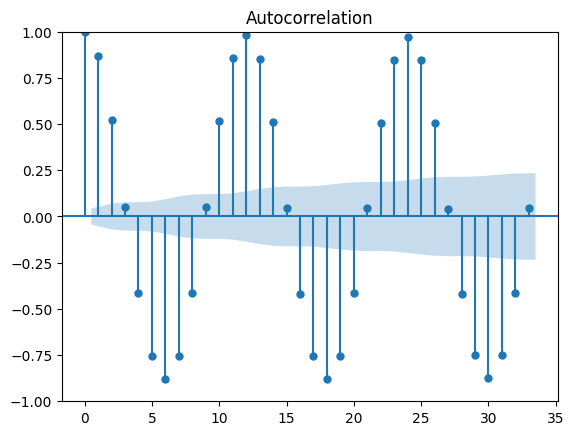

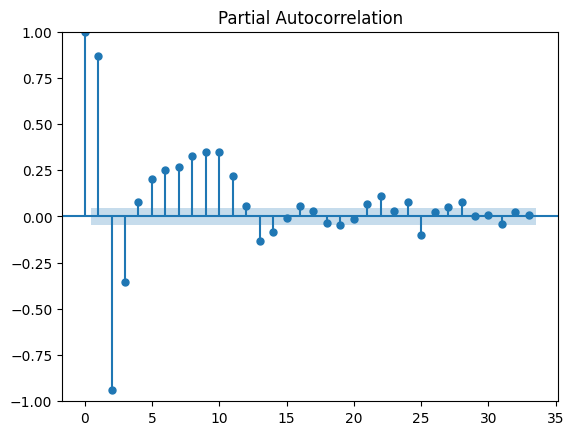

In [ ]:
plot_acf(global_temp_land_and_ocean_cleaned['LandAndOceanAverageTemperature'])
plot_pacf(global_temp_land_and_ocean_cleaned['LandAndOceanAverageTemperature'])
plt.show()

Like in the autocorrelation plots for LandAverageTemperature, we see that the plots display seasonality.

In the partial autocorrelation plot, we also see the seasonality. But the dampening effect in this graph is more dramatic, suggesting that temperature trends in recent years are becomming less reliant on the previous time steps and might be influenced by external factors or long-term trends. This phenomenon could be indicative of changing climate dynamics or human-induced impacts that are altering the traditional seasonal patterns.

## 3.3 EDA in Global Land Temperatures by State Data

The following section conducts exploratory data analysis on the Global Land Temperatures by State Data.

### 3.3.1 Visualize Monthly Trends in Global Land Temperatures by State Data

### 3.3.2 Visualizing Annual Trends

### 3.3.3 Stationarity in Global Land and Ocean Temperatures Data

### 3.3.4 Autocorrelations Check

## 3.4 EDA in Global Land Temperatures by Country Data

### 3.4.1 Dynamic Exploration of Temperature Trends Using Globe
Dynamic exploration of temperature trends via a Plotly line plot for global land temperatures by country.

In [ ]:
countries = np.unique(global_temp_country_cleaned['Country'])
avg_temp_country = []
for country in countries:
    avg_temp_country.append(global_temp_country_cleaned[global_temp_country_cleaned['Country'] == country]['AverageTemperature'].mean())

#interactive
data = [dict(
        type = 'choropleth',
        locations = countries,
        z = avg_temp_country,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

### 3.4.2 Dynamic Exploration of Monthly Trends per Country

This code generates an interactive line plot to visualize the average monthly temperatures for each country.

In [ ]:
# Create an interactive line plot using Plotly Express
avg_temp_by_country_month = global_temp_country_cleaned.groupby(['Country', global_temp_country_cleaned['dt'].dt.month.rename('Month')])['AverageTemperature'].mean().reset_index()

fig = px.line(avg_temp_by_country_month, x='Month', y='AverageTemperature', color='Country',
              labels={'AverageTemperature': 'Average Temperature (°C)', 'Month': 'Month'})

# Set layout options
fig.update_layout(
    title='Average Temperature Time Series by Country (Month)',
    xaxis_title='Month',
    yaxis_title='Average Temperature (°C)',
    height=650
)

# Define the app layout
app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='temperature-plot', figure=fig),
])

# Define callback to update visibility based on legend item (country) clicked
@app.callback(
    Output('temperature-plot', 'figure'),
    Input('temperature-plot', 'clickData')
)

def update_visibility(click_data):
    if click_data is None:
        # No legend item clicked, show all countries
        visible_traces = [True] * len(fig.data)
    else:
        # Find the index of the clicked country in legend
        clicked_country = click_data['points'][0]['curveNumber']
        visible_traces = [i == clicked_country for i in range(len(fig.data))]

    # Update the visibility of traces
    for i, trace in enumerate(fig.data):
        trace.visible = visible_traces[i]

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)


<IPython.core.display.Javascript object>

**To Run:**
To show data for a specific country, double-click on the key. Then, select the country to focus on. To de-select, click on the country again. To view data on all countries, double-click on the key.

These plots align with our understanding of each country's temperatures throughout the year. Specifically, countries in the southern hemisphere are hottest during months six through nine (i.e. June to September), while countries in the northern hemishphere are hottest during this time.

We also see that countries that are closer to the equater have higher average temperatures throughout the year (Australia, Brazil, India).

### 3.4.3 Dynamic Visualization of Annual Trends per Country

This code generates an interactive line plot where each line represents a different country, and the x-axis represents the years.

In [ ]:
# Create an interactive line plot using Plotly Express
avg_temp_by_country_year = global_temp_country_cleaned.groupby(['Country', global_temp_state_cleaned['dt'].dt.year.rename('Year')])['AverageTemperature'].mean().reset_index()

fig2 = px.line(avg_temp_by_country_year, x='Year', y='AverageTemperature', color='Country',
              labels={'AverageTemperature': 'Average Temperature (°C)', 'Year': 'Year'})

# Set layout options
fig2.update_layout(
    title='Average Temperature Time Series by Country (Year)',
    xaxis_title='Year',
    yaxis_title='Average Temperature (°C)',
    height=650
)

# Define the app layout
app2 = Dash(__name__)

app2.layout = html.Div([
    dcc.Graph(id='temperature-plot-2', figure=fig2),
])

# Define callback to update visibility based on legend item (country) clicked
@app2.callback(
    Output('temperature-plot-2', 'figure'),
    Input('temperature-plot-2', 'clickData')
)
def update_visibility(click_data):
    if click_data is None:
        # No legend item clicked, show all countries
        visible_traces = [True] * len(fig2.data)
    else:
        # Find the index of the clicked country in legend
        clicked_country = click_data['points'][0]['curveNumber']
        visible_traces = [i == clicked_country for i in range(len(fig2.data))]

    # Update the visibility of traces
    for i, trace in enumerate(fig2.data):
        trace.visible = visible_traces[i]

    return fig2

# Run the app
if __name__ == '__main__':
    app2.run_server(debug=True, port=8051)

<IPython.core.display.Javascript object>

From this plot, we see a slight upwards trend for average temperature, but zooming in from 1950 - present might provide context.

In [ ]:
# Filter for years >= 1950
avg_temp_by_country_year_filtered = avg_temp_by_country_year[avg_temp_by_country_year['Year'] >= 1950]

fig3 = px.line(avg_temp_by_country_year_filtered, x='Year', y='AverageTemperature', color='Country',
              labels={'AverageTemperature': 'Average Temperature (°C)', 'Year': 'Year'})

# Set layout options
fig3.update_layout(
    title='Average Temperature Time Series by Country (Year)',
    xaxis_title='Year',
    yaxis_title='Average Temperature (°C)',
    height=650
)

# Define the app layout
app3 = Dash(__name__)

app3.layout = html.Div([
    dcc.Graph(id='temperature-plot-3', figure=fig3),
])

# Define callback to update visibility based on legend item (country) clicked
@app3.callback(
    Output('temperature-plot-3', 'figure'),
    Input('temperature-plot-3', 'clickData')
)

def update_visibility(click_data):
    if click_data is None:
        # No legend item clicked, show all countries
        visible_traces = [True] * len(fig3.data)
    else:
        # Find the index of the clicked country in legend
        clicked_country = click_data['points'][0]['curveNumber']
        visible_traces = [i == clicked_country for i in range(len(fig3.data))]

    # Update the visibility of traces
    for i, trace in enumerate(fig3.data):
        trace.visible = visible_traces[i]

    return fig3

# Run the app
if __name__ == '__main__':
    app3.run_server(debug=True, port=8052)


<IPython.core.display.Javascript object>

Here, we can see that many countries exhibit positive trends in their line graphs from 1950 - 2015. Specifically, countries that are most at-risk from global warming like Chad and Afghanistan display significant increases in temperature over this period. This is an alarming upward trajectory.

### 3.4.4 Autocorrelations Check

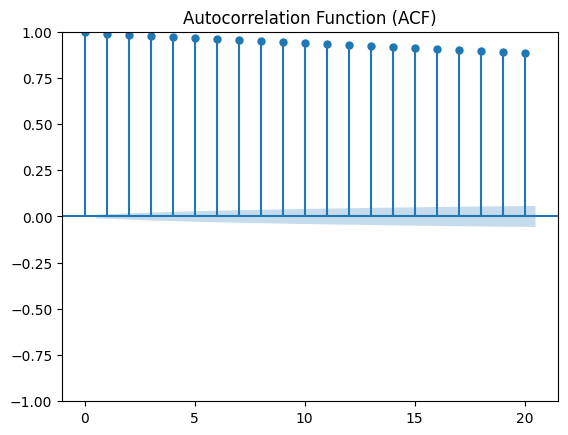

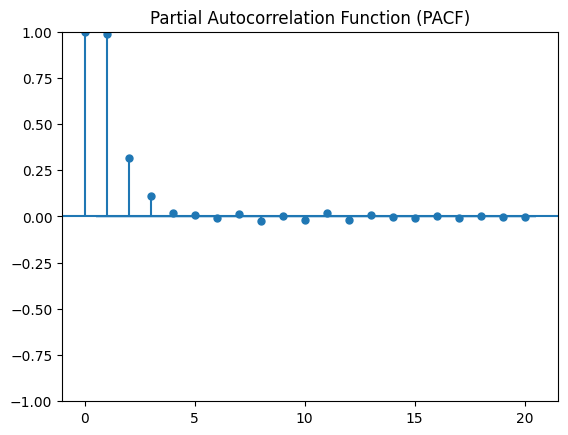

In [ ]:
plot_acf(avg_temp_by_country_year['AverageTemperature'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(avg_temp_by_country_year['AverageTemperature'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

From these plots, we know that there is no correlation between the data points. This makes sense, because the average temperature of each country, should not be dependent on another country.

## 3.5 EDA in Global Land Temperatures by City Data

### 3.5.1 Latitude

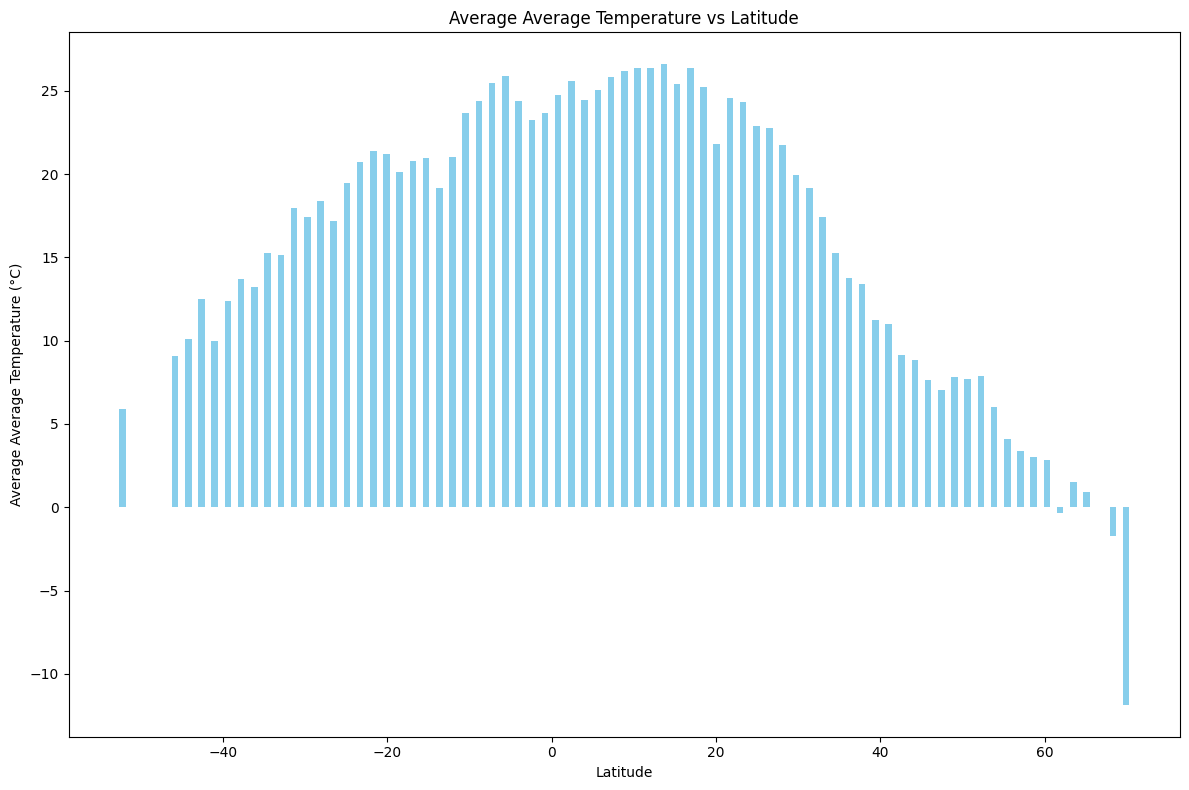

In [ ]:
latitude_df = global_temp_city_cleaned.sort_values(by='Latitude')

avg_temp_by_latitude = latitude_df.groupby('Latitude')['AverageTemperature'].mean()

plt.figure(figsize=(12, 8))
plt.bar(avg_temp_by_latitude.index, avg_temp_by_latitude.values, color='skyblue')
plt.xlabel('Latitude')
plt.ylabel('Average Average Temperature (°C)')
plt.title('Average Average Temperature vs Latitude')
plt.tight_layout()
plt.show()

This plot emphasizes what we already know about temperature trends in relation to latitude. Specifically, near the equator (i.e. latitude = 0), temperatures are generally higher due to the direct sunlight received, while temperatures decrease towards the poles where sunlight is spread out over a larger area.

### 3.5.2 Contour Plot

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
AttributeError: 'Figure' object has no attribute 'data'



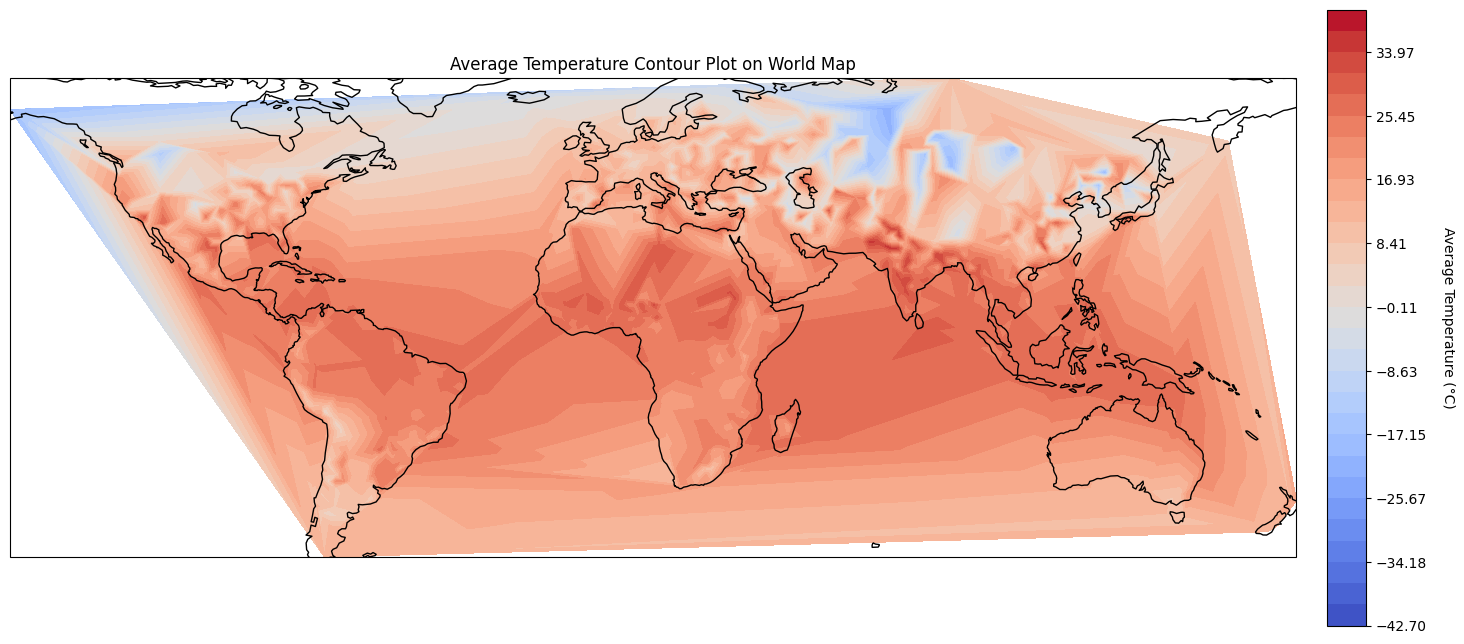

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

contour = plt.tricontourf(global_temp_city_cleaned['Longitude'], global_temp_city_cleaned['Latitude'], global_temp_city_cleaned['AverageTemperature'],
                          transform=ccrs.PlateCarree(), cmap='coolwarm', levels=np.linspace(min(global_temp_city_cleaned['AverageTemperature']), max(global_temp_city_cleaned['AverageTemperature']), 30))

cbar = plt.colorbar(contour, orientation='vertical', pad=0.02, aspect=16, shrink=0.8)
cbar.set_label('Average Temperature (°C)', rotation=270, labelpad=20)

plt.title('Average Temperature Contour Plot on World Map')
plt.show()

## 3.6 EDA in Global Land Temperatures by Major City Data

In [ ]:
#interactive
fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        lon=global_temp_major_city['Longitude'],
        lat=global_temp_major_city['Latitude'],
        text=global_temp_major_city['City'],
        mode='text',
    )
)

fig.update_layout(
    title='Average Temperature Contour Plot with Major Cities on World Map',
    geo=dict(
        resolution=50,
        showland=True,
        showlakes=True,
        landcolor='rgb(217, 217, 217)',
        countrycolor='rgb(82, 82, 82)',
    ),
    height=1000,
    width=1900
)

py.iplot(fig)

# Part 4: Feature Engineering & Preprocessing

## 4.1 Correlation Matrix

<ipython-input-302-b7069e6355e8>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



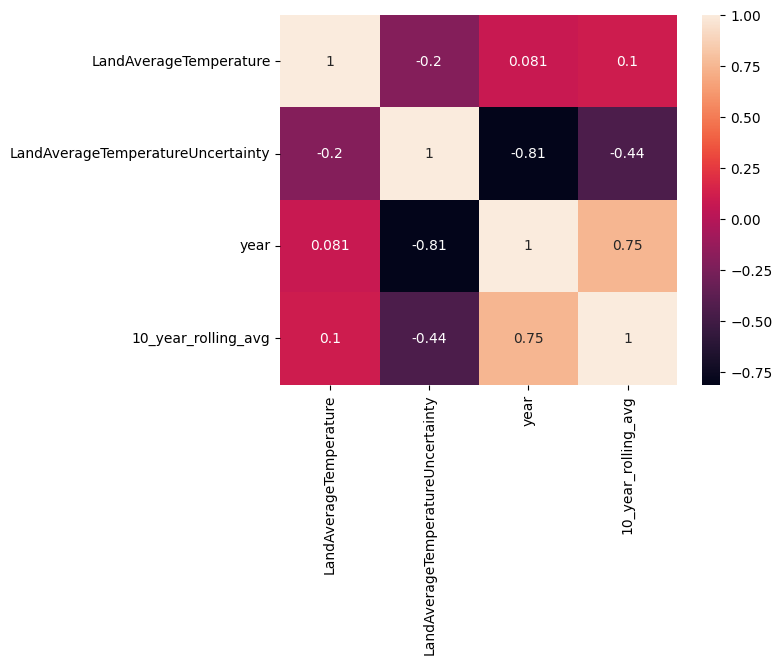

In [ ]:
correlation_matrix_1 = global_temp_land_cleaned.corr()
sns.heatmap(correlation_matrix_1, annot=True)
plt.show()

There are pairs of variables that are closely related to each other, we will address those later during model building.

# Part 5: Modeling

## 5.1 Linear Regression (fix cuz time series data need to split by date instead of by random?)

In [ ]:
global_temp_city['dt'] = pd.to_datetime(global_temp_city['dt'])
global_temp_city['year'] = global_temp_city['dt'].dt.year
X = global_temp_city[['year']]
y = global_temp_city[['AverageTemperature']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_rg = LinearRegression()
lin_rg.fit(X_train, y_train)

ValueError: ignored

### Predict on Future Years

In [ ]:
latest_year = global_temp_city['year'].max()
years_to_pred = []
for i in range(0, 501, 20):
    years_to_pred.append(latest_year + i)
future_years = pd.DataFrame({'year': years_to_pred})

predicted_temperatures = lin_rg.predict(future_years)

In [ ]:
plt.scatter(global_temp_city['year'], global_temp_city['AverageTemperature'], label='Observed Data')
plt.plot(future_years['year'], predicted_temperatures, 'ro-', label='Predicted Temperatures')
plt.xlabel('year')
plt.ylabel('Average Temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

### Evaluate Performance

In [ ]:
y_pred = lin_rg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')